# Questions and Objectives


1. YouTube Analytics: Which are the success factors of top YouTube channels and what sets them apart from the rest?
2. Content Strategy: Which are the most popular categories and upload frequencies that resonate with audiences?
3. Regional Influencers: Who are the influential YouTube creators from different countries and which is their impact on a global scale?
4. Earnings Analysis: How does the correlation between channel performance and estimated earnings looks like?
5. Geospatial Visualization: How looks the distribution of successful YouTube channels on a world map like and which geographical trends can be observed?
6. Trending Topics: how certain categories gain popularity over time and correlate with world events?
7. Modeling: future earnings.

# Loading Data

In [774]:
import pandas as pd
import numpy as np

In [775]:
import chardet

rawdata = open('../data/raw/Global_YouTube_Statistics.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

data = pd.read_csv('../data/raw/Global_YouTube_Statistics.csv', encoding=encoding)

In [776]:
print(data.shape)
data.head()

(995, 28)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# EDA

In [777]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [778]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [779]:
data.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [780]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)*100).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,rank,0.000000
1,Youtuber,0.000000
2,subscribers,0.000000
3,video views,0.000000
4,category,4.623116
5,Title,0.000000
6,uploads,0.000000
7,Country,12.261307
8,Abbreviation,12.261307
9,channel_type,3.015075


This is the column I want to predict with my model.

In [781]:
data['highest_yearly_earnings'].value_counts()

highest_yearly_earnings
0.00           79
1300000.00     21
2100000.00     17
1400000.00     15
1200000.00     13
               ..
0.58            1
35000000.00     1
742.00          1
76700000.00     1
185800.00       1
Name: count, Length: 419, dtype: int64

In [782]:
data['lowest_yearly_earnings'].value_counts()

lowest_yearly_earnings
0.00          89
0.01          16
1200000.00    11
1100000.00     9
1300000.00     9
              ..
74100.00       1
80900.00       1
7400.00        1
355200.00      1
72000.00       1
Name: count, Length: 757, dtype: int64

In [783]:
data['subscribers_for_last_30_days'].value_counts()

subscribers_for_last_30_days
100000.0     256
200000.0     104
300000.0      59
400000.0      39
500000.0      25
600000.0      24
700000.0      20
1.0           16
900000.0      11
1100000.0      9
1000000.0      8
800000.0       8
10.0           7
1300000.0      6
1200000.0      5
1600000.0      5
100.0          4
2.0            4
4.0            3
1000.0         3
3.0            3
1900000.0      3
8.0            2
5.0            2
3400000.0      2
3200000.0      2
2000000.0      2
6.0            1
151.0          1
1500000.0      1
75.0           1
130.0          1
132.0          1
10000.0        1
600.0          1
1700000.0      1
3580.0         1
9.0            1
800.0          1
11.0           1
3000000.0      1
2000.0         1
230000.0       1
2960.0         1
6700000.0      1
30.0           1
12.0           1
5500000.0      1
40000.0        1
1400000.0      1
2100000.0      1
8000000.0      1
32.0           1
Name: count, dtype: int64

In [784]:
data['country_rank'].value_counts(dropna=False)

country_rank
NaN       116
1.0        43
2.0        30
3.0        26
5.0        19
         ... 
56.0        1
1874.0      1
7700.0      1
136.0       1
867.0       1
Name: count, Length: 247, dtype: int64

In [785]:
data['channel_type_rank'].value_counts(dropna=False)

channel_type_rank
NaN       33
1.0       12
3.0       11
8.0       11
36.0      11
          ..
6217.0     1
7136.0     1
7492.0     1
7471.0     1
1202.0     1
Name: count, Length: 287, dtype: int64

# Splitting Numerical Data - EDA Numerical Data

I am splitting the data base into two data frames: one numerical and the other categorical

In [786]:
def split_num_cat(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    numerical_columns = df.select_dtypes(np.number).columns.tolist()
    
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    numerical_df = df[numerical_columns]
    categorical_df = df[categorical_columns]
    
    return categorical_df, numerical_df




In [787]:
categorical_df, numerical_df = split_num_cat(data)


In [788]:
categorical_df

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
992,Panda,NaN,HybridPanda,United Kingdom,GB,Games,Sep
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [789]:
numerical_df

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,700000.0,2017.0,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,300000.0,2018.0,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,...,3.200000e+03,1000.0,2006.0,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,100000.0,2012.0,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


As it can be seen, this is ranking based on the number of subscriber and the highest yearly earnings

Note: The number of uploads since the beginning looks strange. 

In [790]:
numerical_df

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,700000.0,2017.0,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,300000.0,2018.0,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,...,3.200000e+03,1000.0,2006.0,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,100000.0,2012.0,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


I keep on exploring the numerical columns.

In [791]:
numerical_df['uploads'].value_counts()

uploads
0        43
1        26
2         9
3         8
6         6
         ..
47926     1
33229     1
1323      1
296       1
2452      1
Name: count, Length: 777, dtype: int64

Understanding the numbers in the column 'video_views_rank' is a little bit challenging. I adventure to state that the channels that are found very low in the rank did not offer information on the total video views. Or otherwise the No. is 0 in this data base. These conclusion can be reached based on the number of uploads as well, since there 43 channels with 0 uploads and there are some others with a very limited number of uploads. 

In [792]:
numerical_df['video_views_rank'].value_counts()

video_views_rank
4057944.0    36
3612215.0     4
2218.0        2
621.0         2
630.0         2
             ..
1936958.0     1
4057657.0     1
4038708.0     1
987.0         1
4568.0        1
Name: count, Length: 953, dtype: int64

In [793]:
numerical_df['video_views_rank'].unique()

array([1.000000e+00, 4.055159e+06, 4.800000e+01, 2.000000e+00,
       3.000000e+00, 4.057944e+06, 5.000000e+00, 4.400000e+01,
       6.300000e+02, 8.000000e+00, 1.200000e+01, 7.000000e+00,
       3.200000e+01, 4.056562e+06, 4.000000e+00, 4.057901e+06,
       1.120000e+02, 3.898122e+06, 3.800000e+01, 4.600000e+01,
       9.000000e+00, 2.300000e+01, 2.500000e+01, 1.800000e+01,
       4.700000e+01, 1.000000e+01, 4.053938e+06, 1.820000e+02,
       1.100000e+01, 3.000000e+01, 1.300000e+01, 2.100000e+01,
       7.100000e+01, 4.500000e+01, 5.900000e+01, 2.330000e+02,
       2.800000e+01, 3.800129e+06, 3.900000e+01, 3.700000e+01,
       4.000000e+01, 7.800000e+01, 4.500000e+02, 2.370000e+02,
       2.630000e+02, 3.500000e+01, 9.700000e+01, 4.047729e+06,
       5.500000e+01, 4.053056e+06, 4.046070e+06, 4.190000e+02,
       1.050000e+02, 1.740000e+02, 6.810000e+02, 2.000000e+01,
       7.000000e+01, 1.741000e+03, 1.600000e+01, 4.056116e+06,
       4.047806e+06, 5.200000e+01, 2.600000e+01, 2.4000

In [794]:
numerical_df.columns

Index(['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [795]:
def split_dataframe(df: pd.DataFrame, threshold: int=36)-> tuple[pd.DataFrame, pd.DataFrame]:

    """
    This function takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second 
    containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. 
    The function has an optional argument set by default to 36 to discriminate between continuous and discrete columns.
    """
    # Initialize two empty DataFrames
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    # Iterate over each column in the input DataFrame
    for column in df.columns:
        # Check if the column data type is numeric
        if np.issubdtype(df[column].dtype, np.number):
            # If the number of unique values is above the threshold, it's continuous
            if df[column].nunique() > threshold:
                continuous_df = pd.concat([continuous_df, df[column]], axis=1)
            # Otherwise, it's discrete
            else:
                discrete_df = pd.concat([discrete_df, df[column]], axis=1)

    display(continuous_df)
    display(discrete_df)
    return continuous_df, discrete_df

In [796]:
continuous_df, discrete_df = split_dataframe(numerical_df)

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,1200,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,1500,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,2452,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,39,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


,created_year,created_date
0,2006.0,13.0
1,2006.0,5.0
2,2012.0,20.0
3,2006.0,1.0
4,2006.0,20.0
...,...,...
990,2017.0,12.0
991,2018.0,14.0
992,2006.0,11.0
993,2012.0,9.0


Here I am cleaning subscribers_for_last_30_days.

In [797]:
indexes_with_na = continuous_df['subscribers_for_last_30_days'].isna()

# Drop NaN values from the column
column_without_nans = continuous_df['subscribers_for_last_30_days'].dropna()

for index in indexes_with_na[indexes_with_na].index:
    x = np.random.rand()  # Generate a random number between 0 and 1
    continuous_df.loc[index, 'subscribers_for_last_30_days'] = column_without_nans.quantile(x)  # Fill the missing value with the x-th quantile of 'subscribers_for_last_30_days'

In [798]:
continuous_df['subscribers_for_last_30_days'].value_counts(dropna=False)

subscribers_for_last_30_days
100000.000000    376
200000.000000    171
300000.000000     87
400000.000000     58
500000.000000     40
                ... 
2.223720           1
2960.000000        1
230000.000000      1
1484.421265        1
726876.328510      1
Name: count, Length: 71, dtype: int64

In [799]:
indexes_with_na =continuous_df['video_views_for_the_last_30_days'].isna()

# Drop NaN values from the column
column_without_nans = continuous_df['video_views_for_the_last_30_days'].dropna()

for index in indexes_with_na[indexes_with_na].index:
    x = np.random.rand()  # Generate a random number between 0 and 1
    continuous_df.loc[index, 'video_views_for_the_last_30_days'] = column_without_nans.quantile(x)  # Fill the missing value with the x-th quantile of 'subscribers_for_last_30_days'

In [800]:
continuous_df['video_views_for_the_last_30_days'].value_counts(dropna=False)

video_views_for_the_last_30_days
1.000000e+00    10
2.000000e+00     9
3.000000e+00     4
4.000000e+00     4
7.000000e+00     3
                ..
8.897769e+07     1
1.606900e+08     1
1.602270e+08     1
1.031710e+08     1
2.400000e+07     1
Name: count, Length: 963, dtype: int64

In [801]:
nulls_percent_df = pd.DataFrame(continuous_df.isna().sum()/len(data)*100).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,rank,0.000000
1,subscribers,0.000000
2,video views,0.000000
3,uploads,0.000000
4,video_views_rank,0.100503
5,country_rank,11.658291
6,channel_type_rank,3.316583
7,video_views_for_the_last_30_days,0.000000
8,lowest_monthly_earnings,0.000000
9,highest_monthly_earnings,0.000000


## Earnings Analysis: How does the correlation between channel performance and estimated earnings looks like?

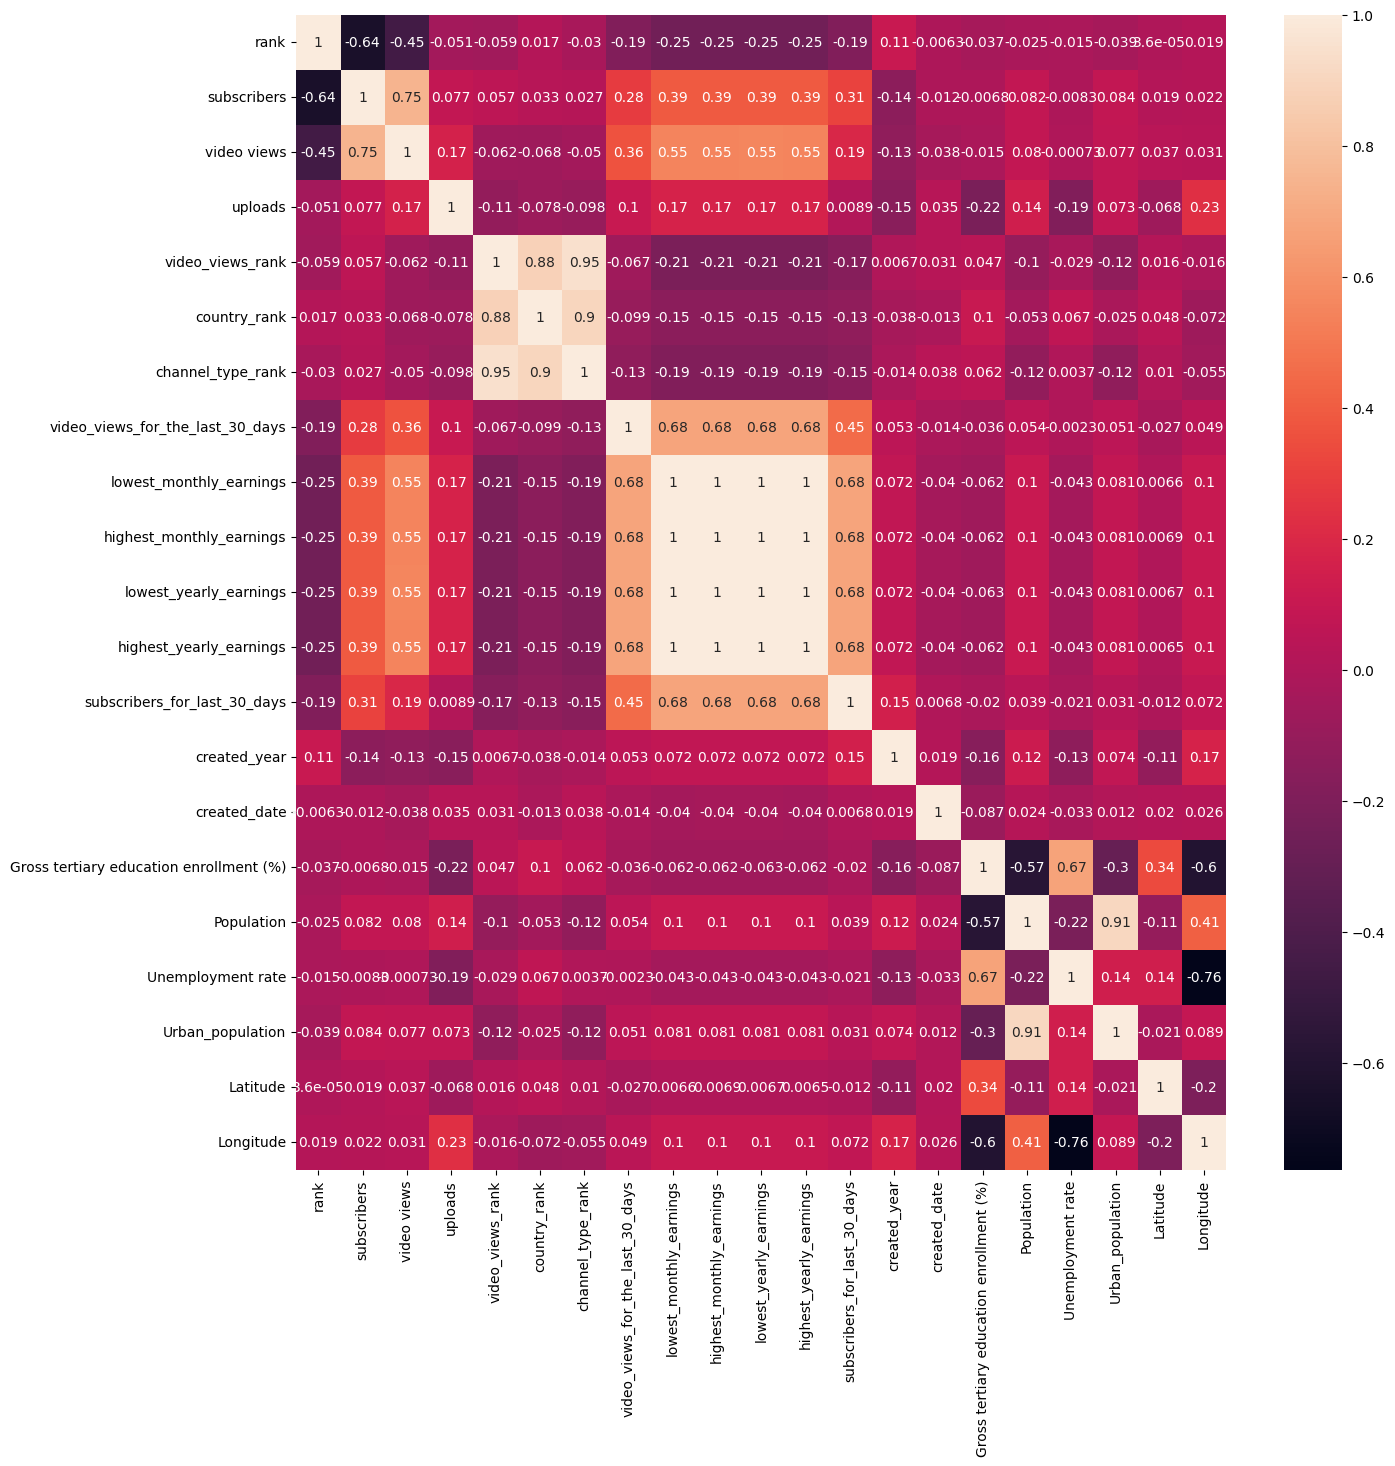

In [802]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

There is a high correlation in between video views and number of subscribers (0.75).
There is in between video_views_rank, and country_rank and channel_type_rank as well.

It can be observed a high multicollinearity in between our (y)('highest_yearly_earnings') and 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings'. video_views_rank, country_rank, channel_type_rank can be dropped due to the low correlation.
There is no other column to drop. There is not a correlation greater than 0.9 in between.  

I am dropping these columns in order to plot the correlation matrix and to visualize better.

In [803]:
continuous_df = continuous_df.drop(columns = ['rank', 'video_views_rank', 'country_rank', 'channel_type_rank', 
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'])


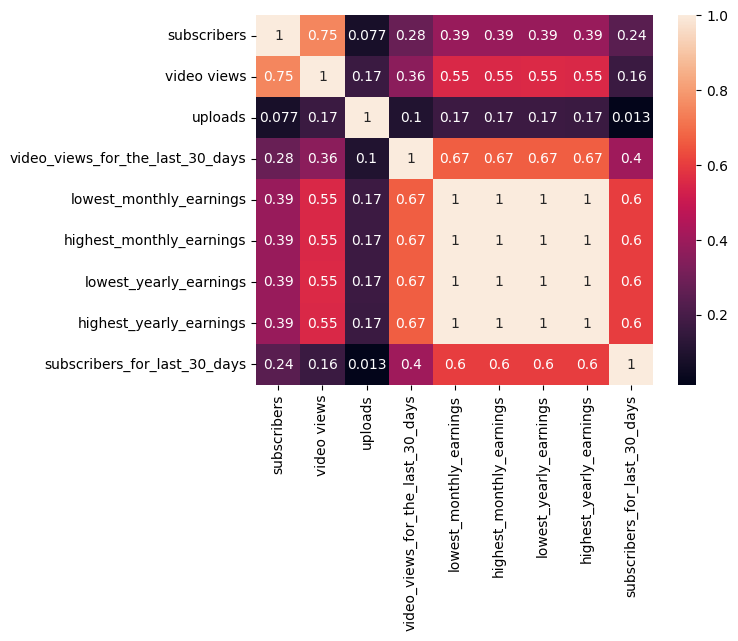

In [804]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Checking the skewness and distributions

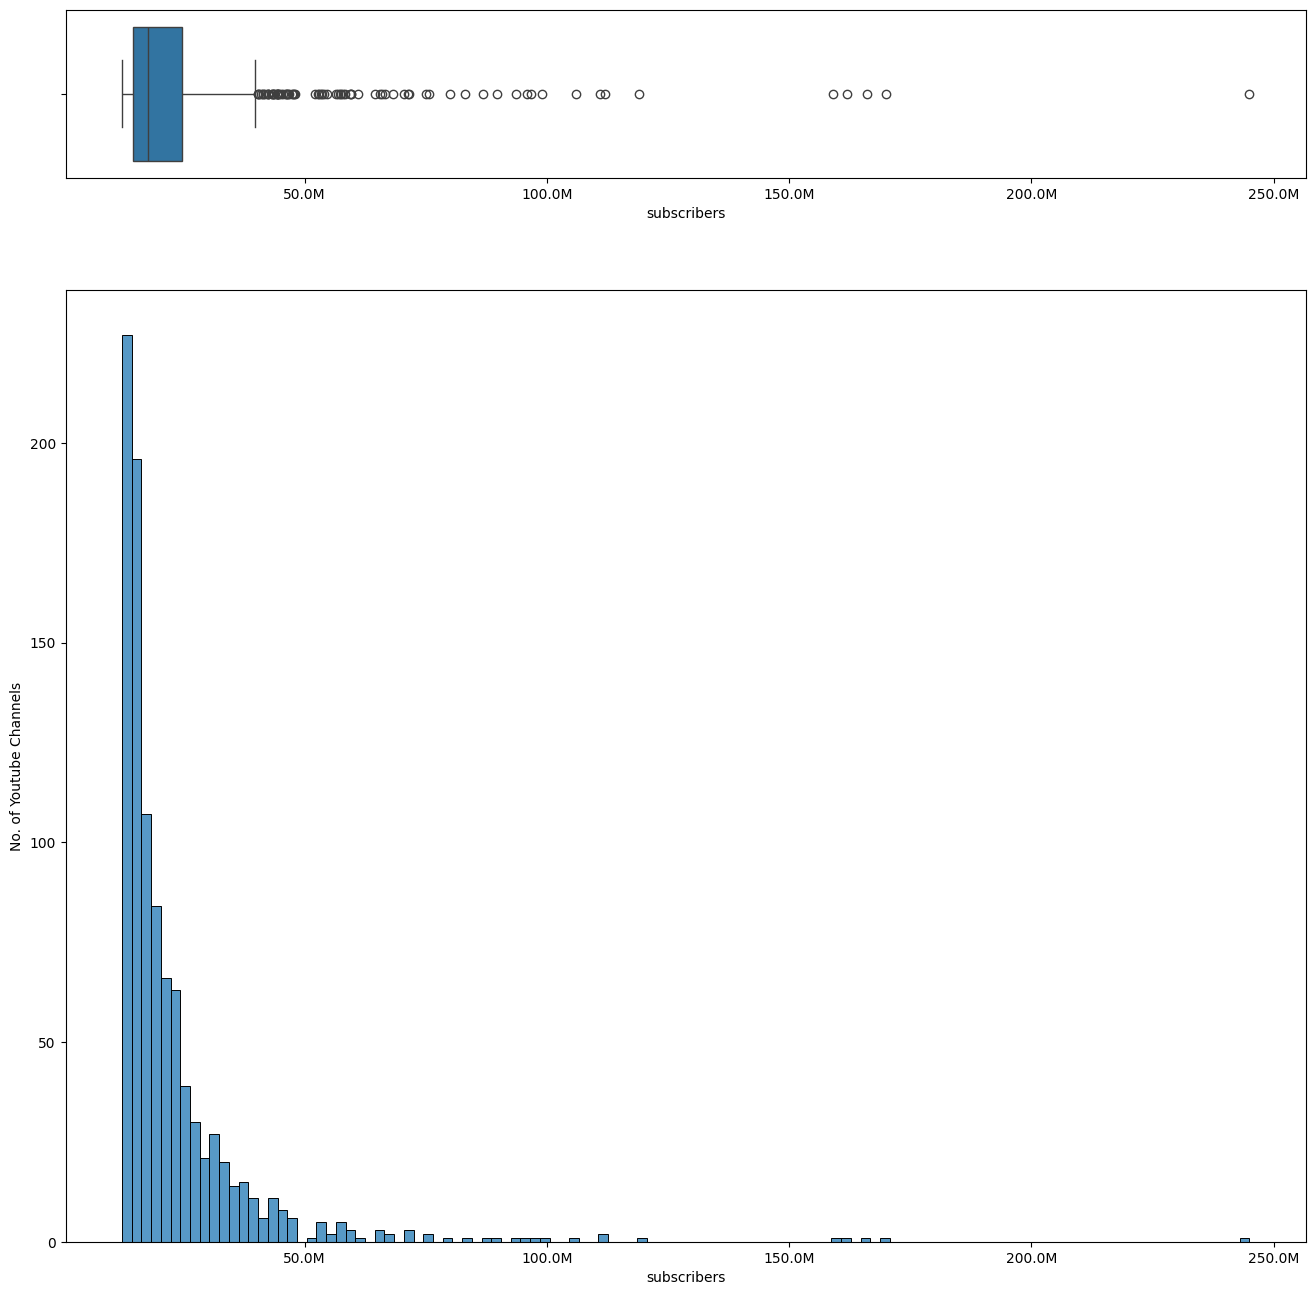

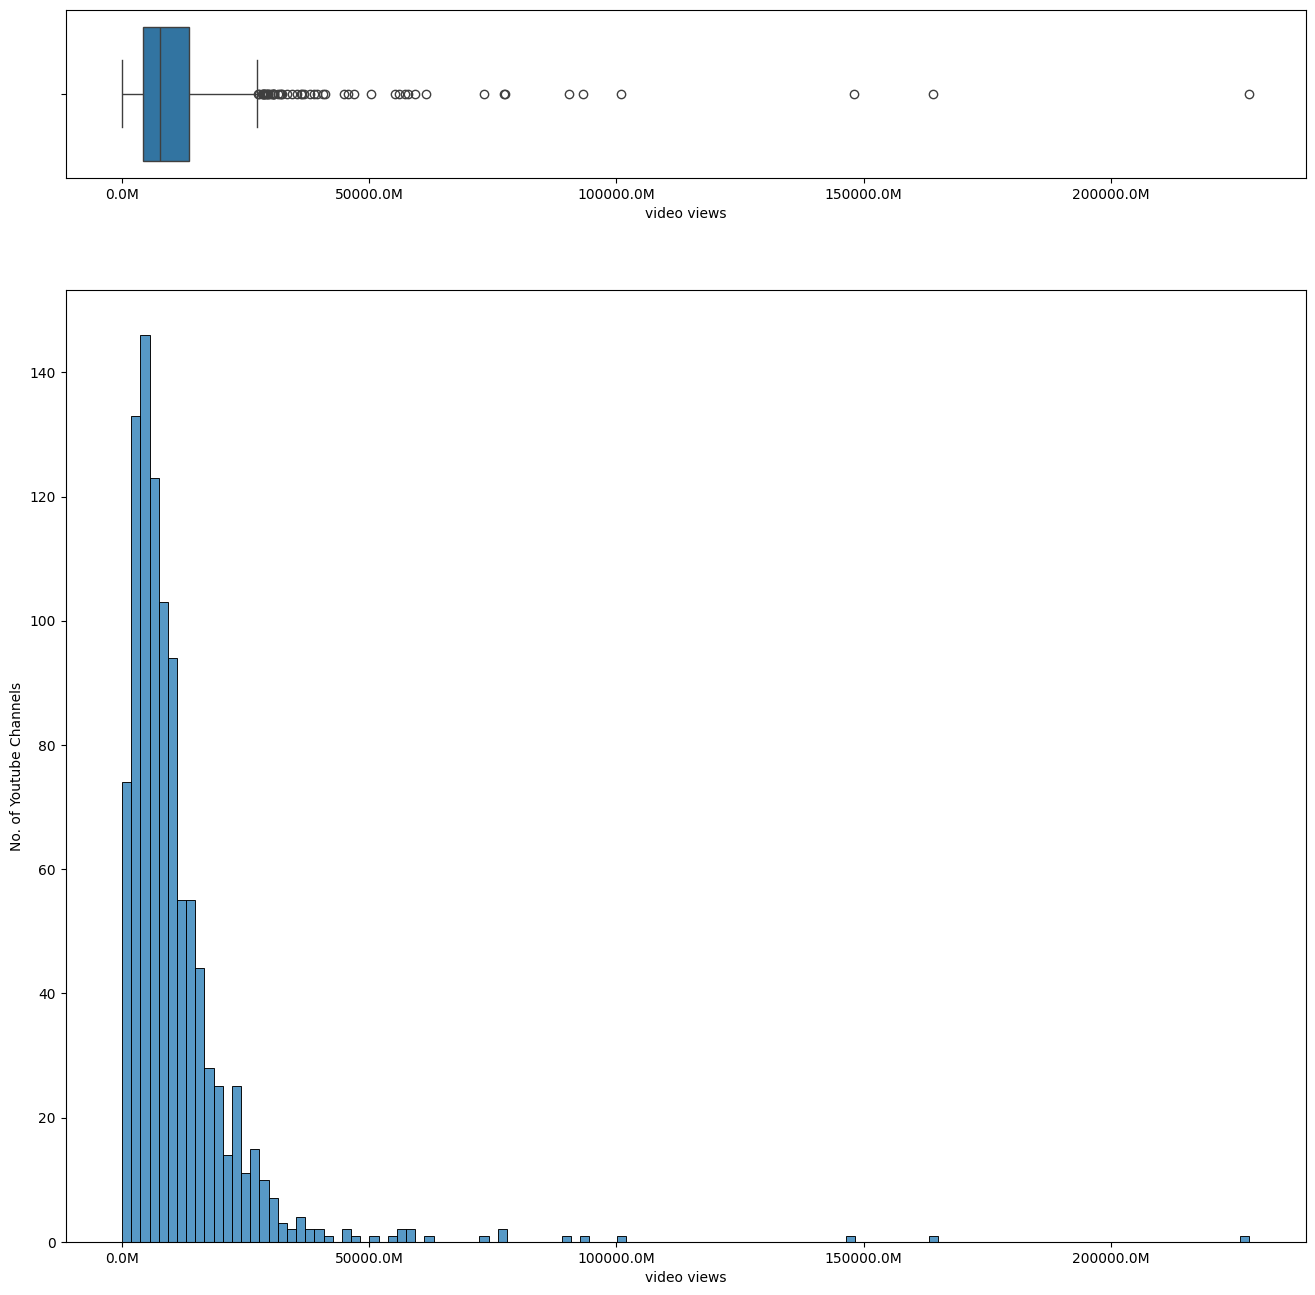

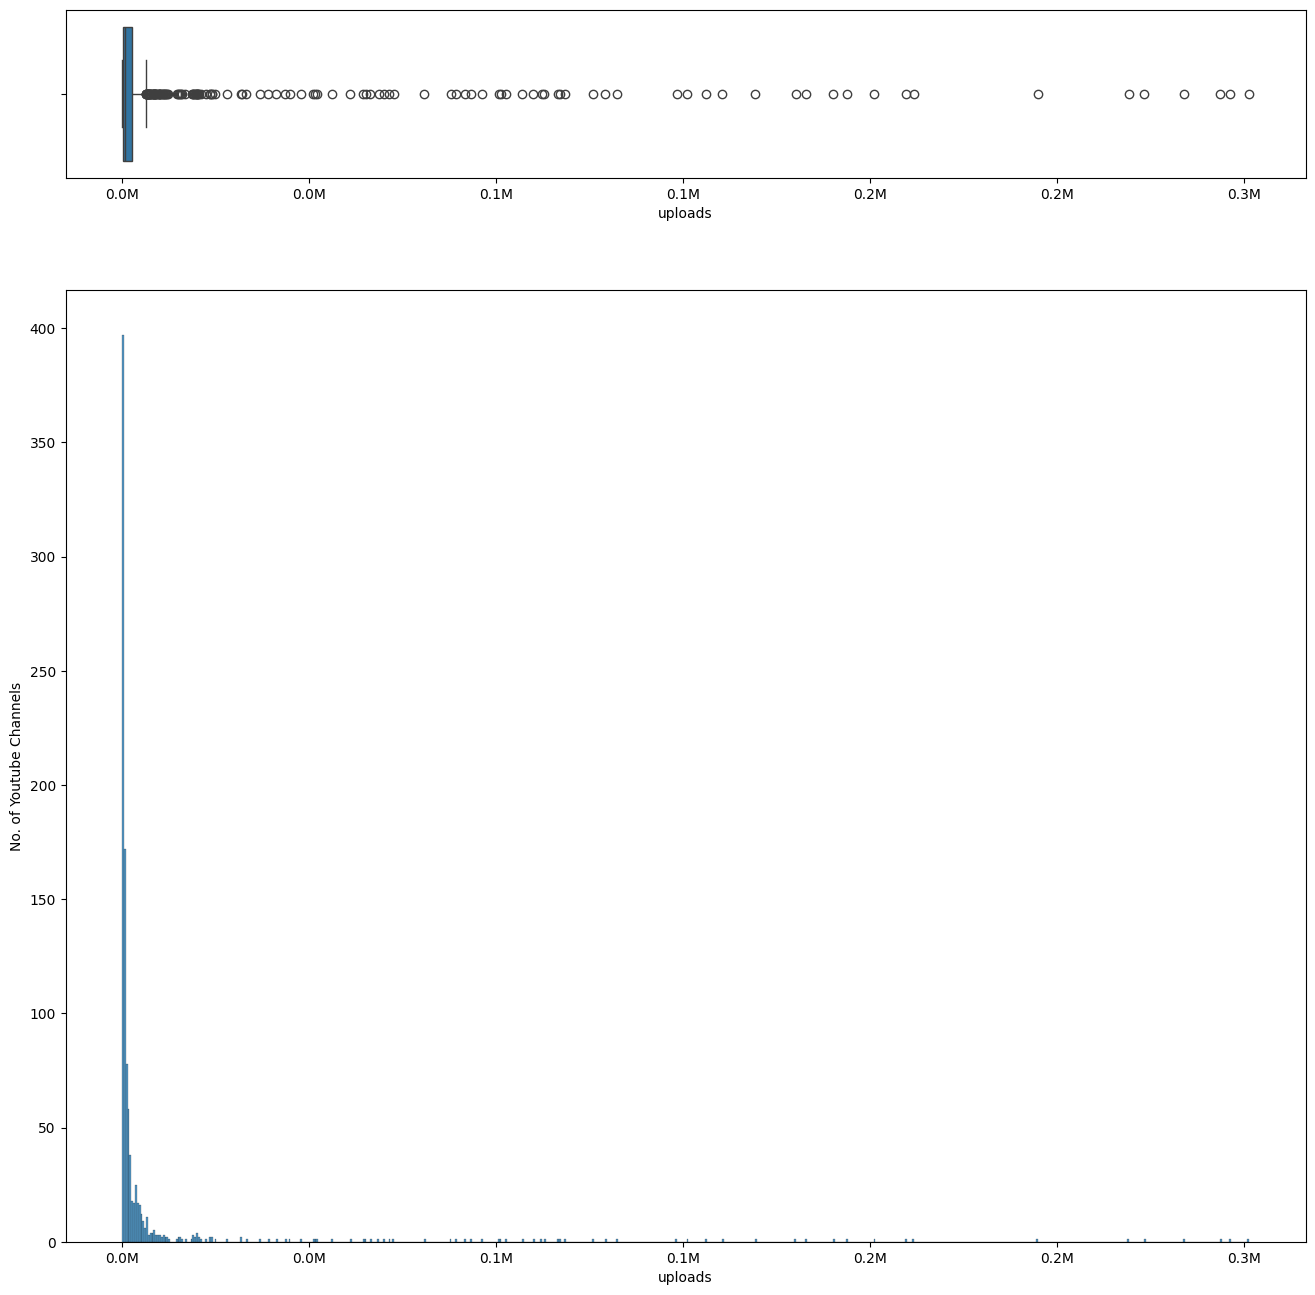

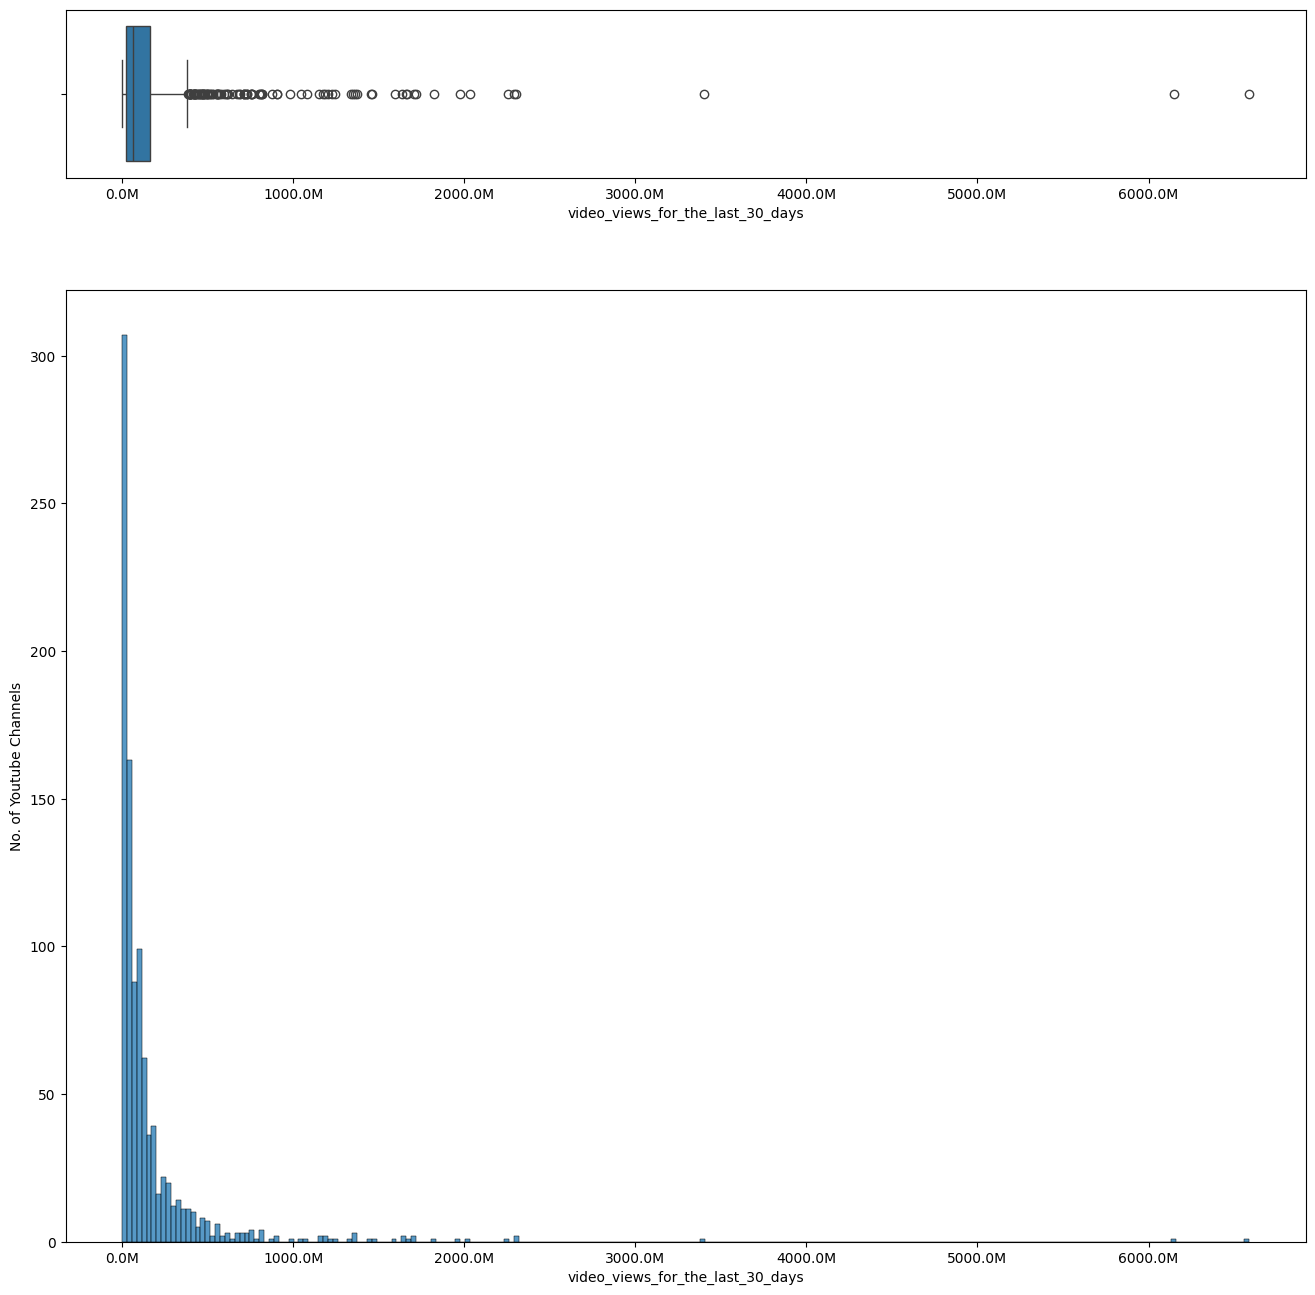

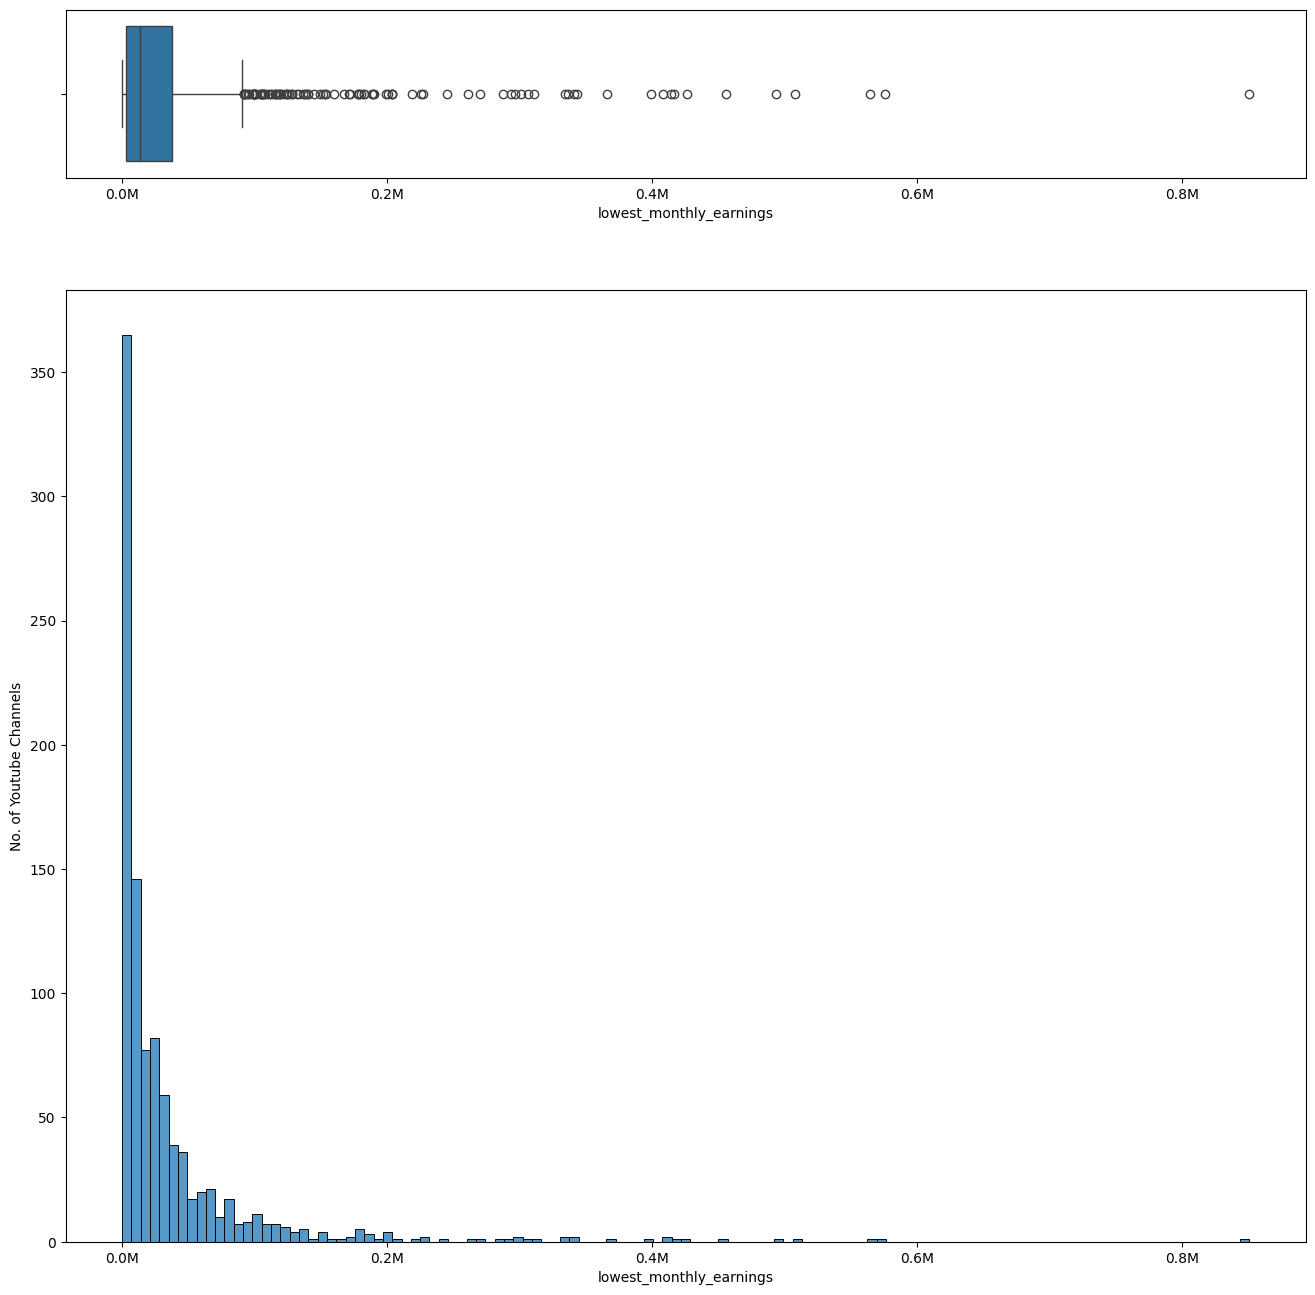

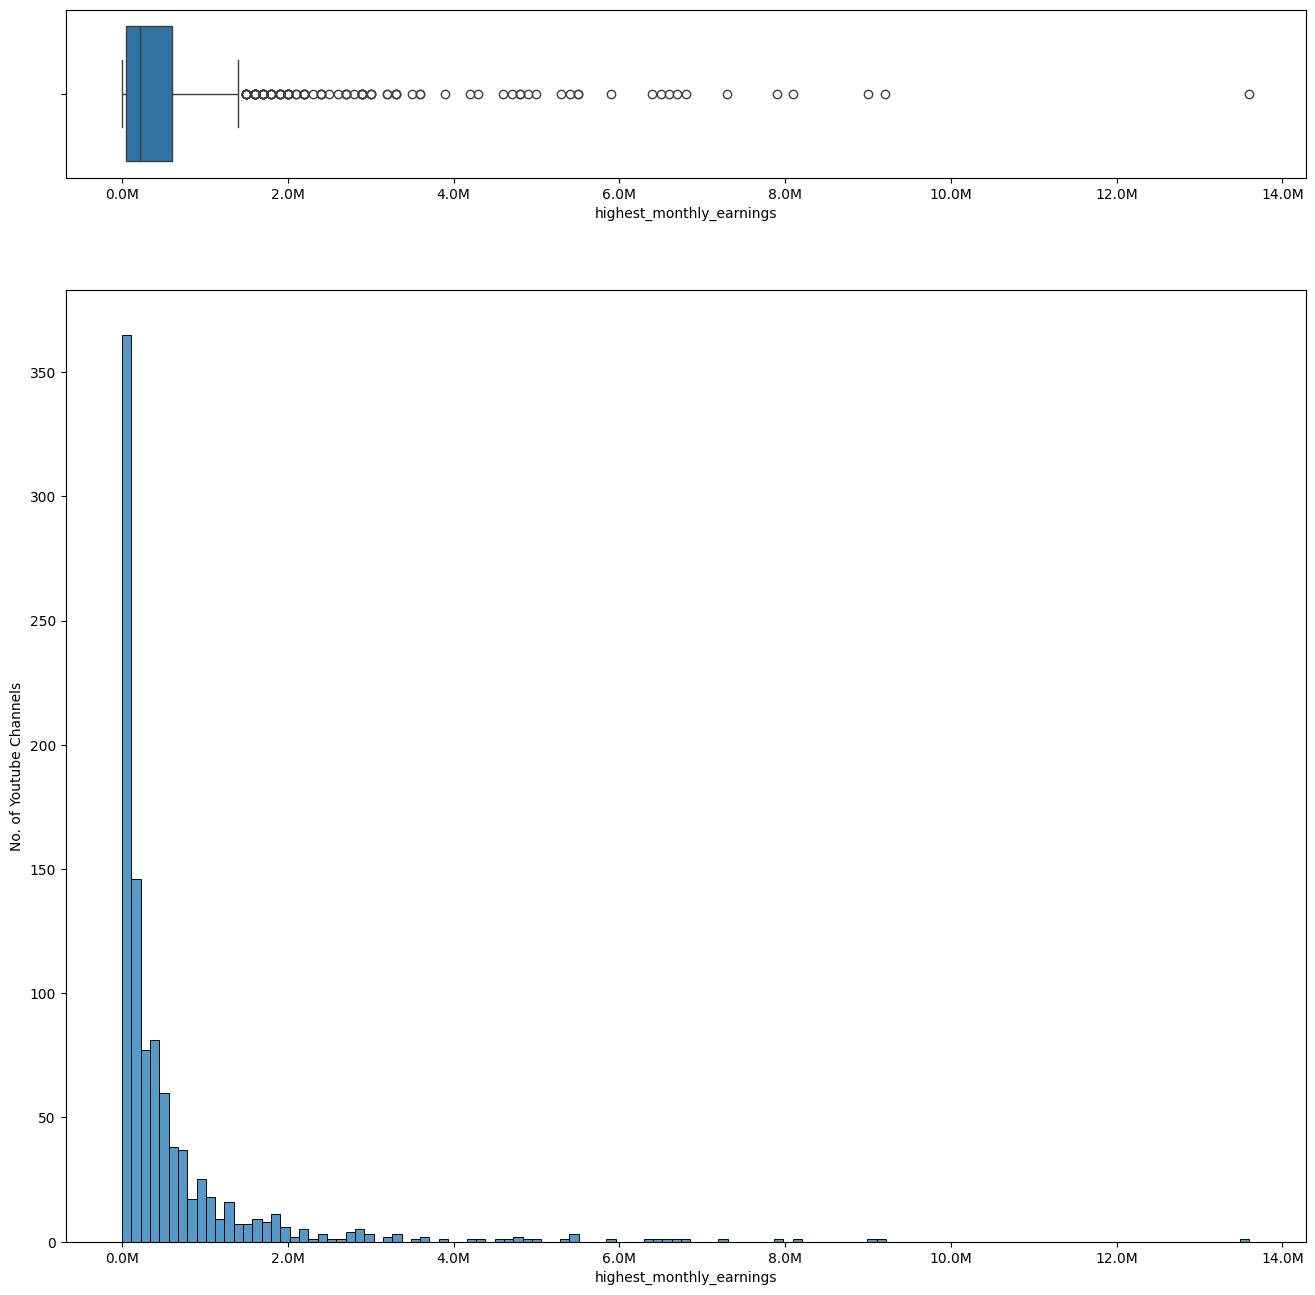

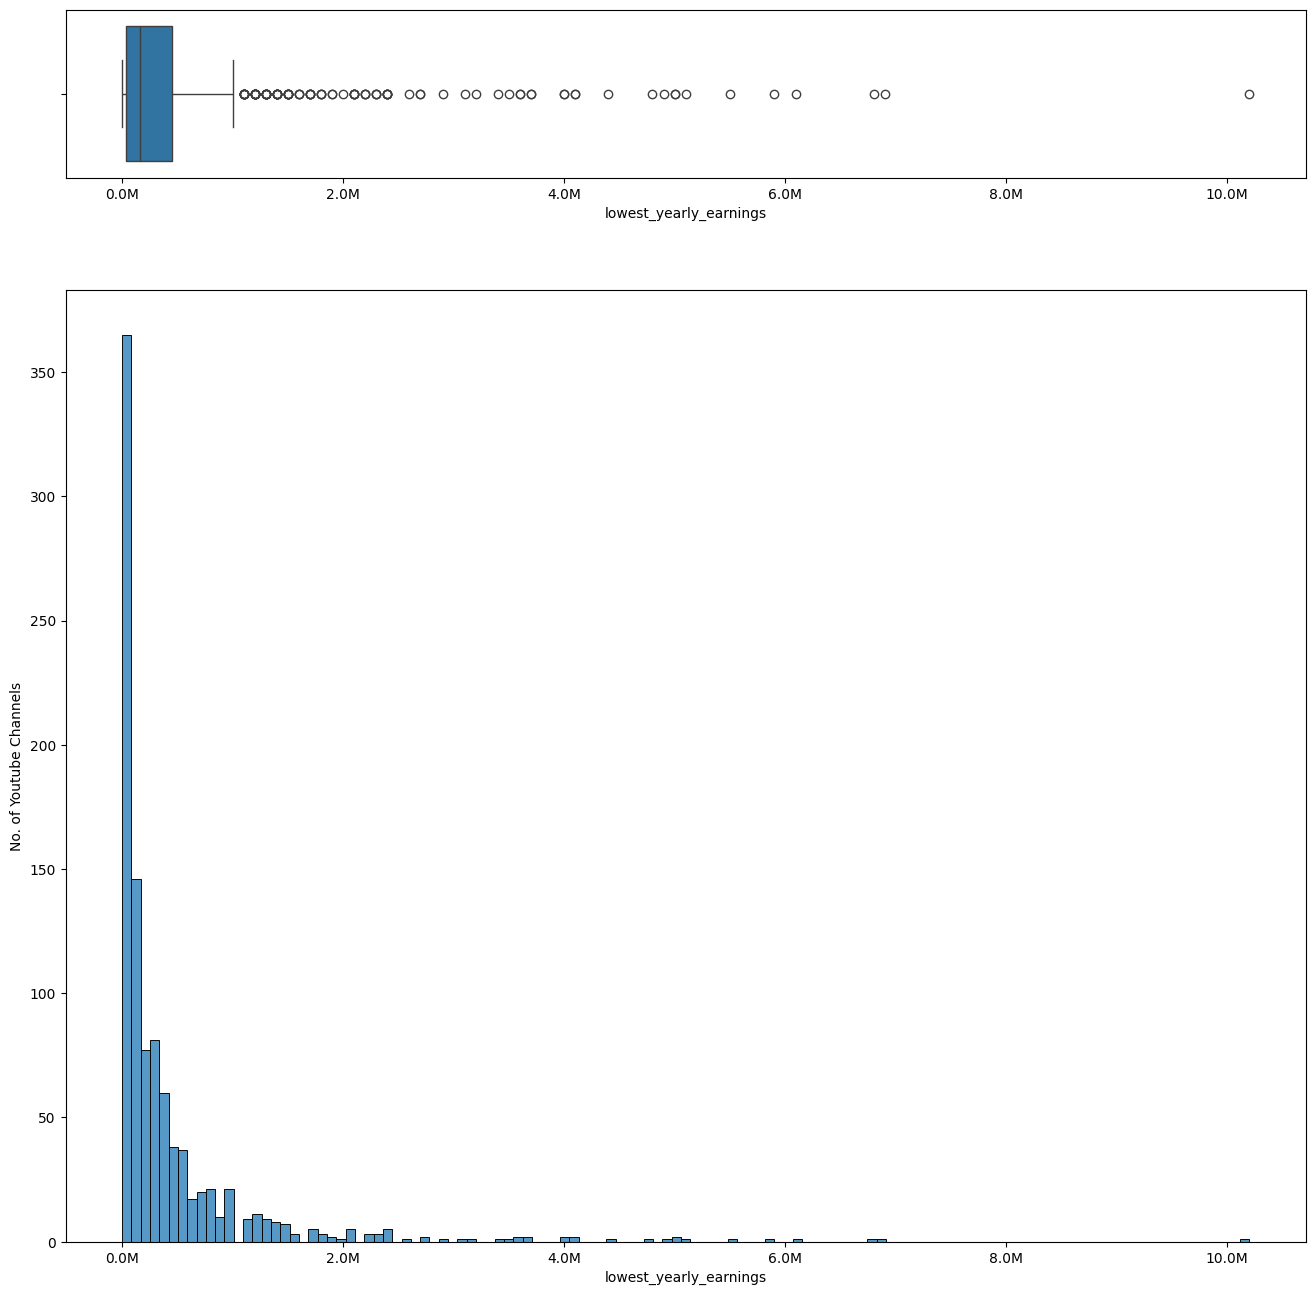

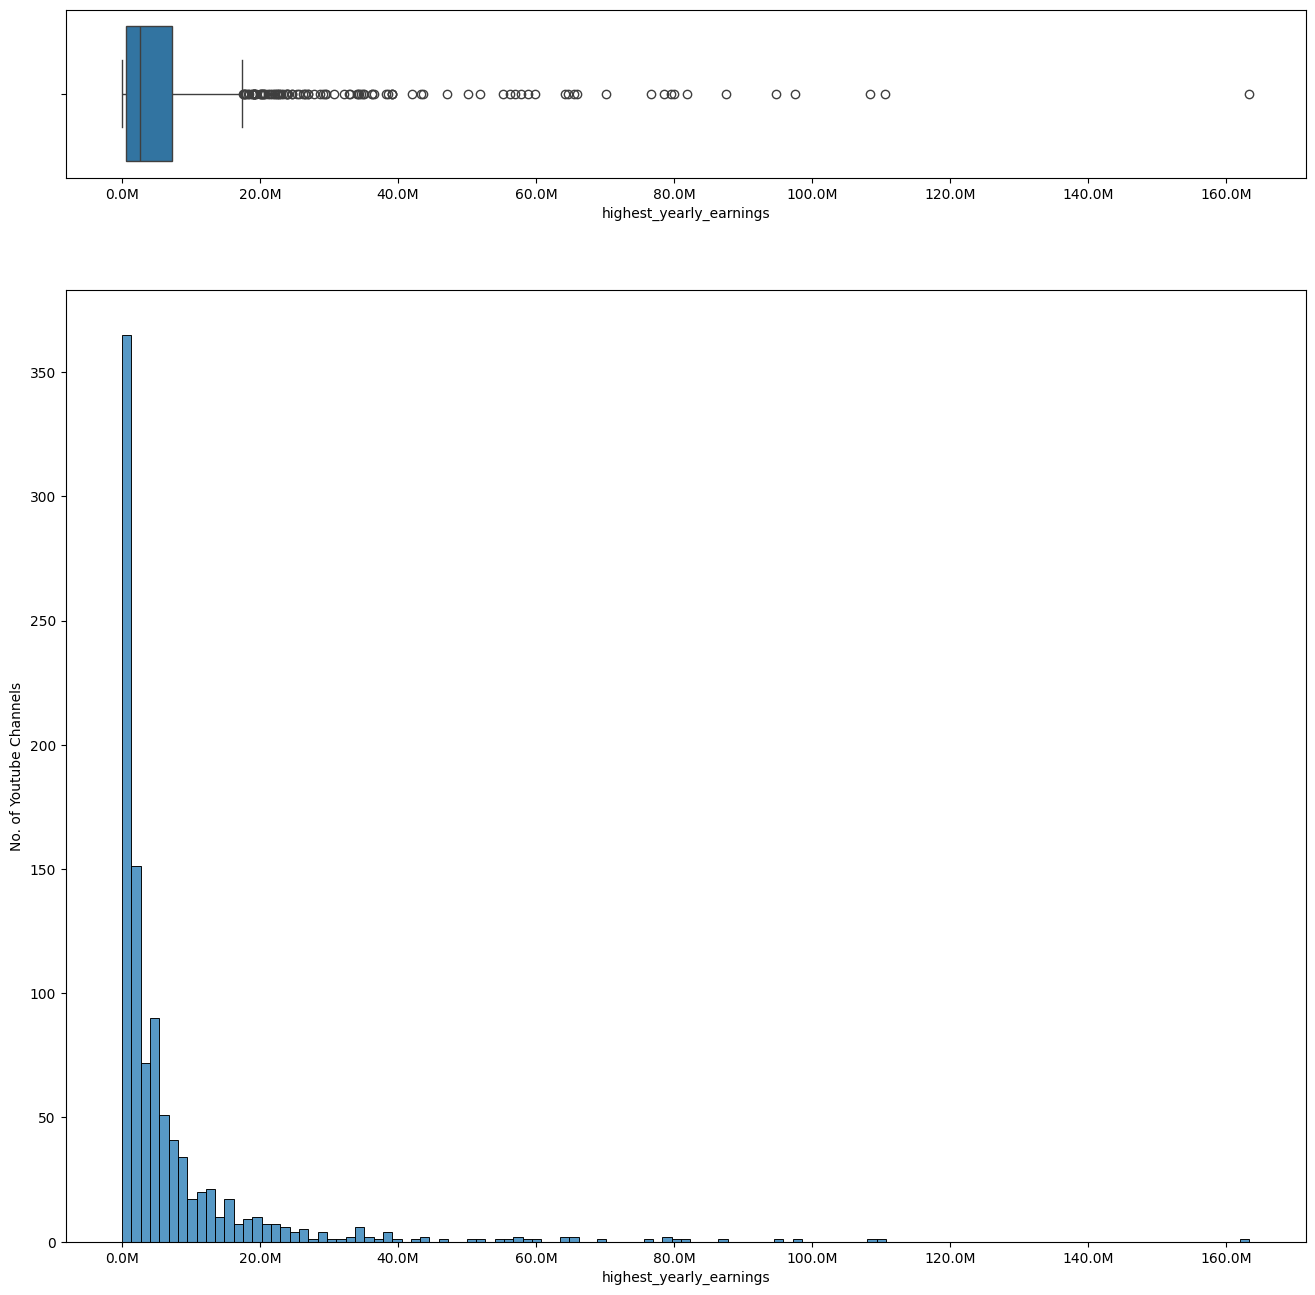

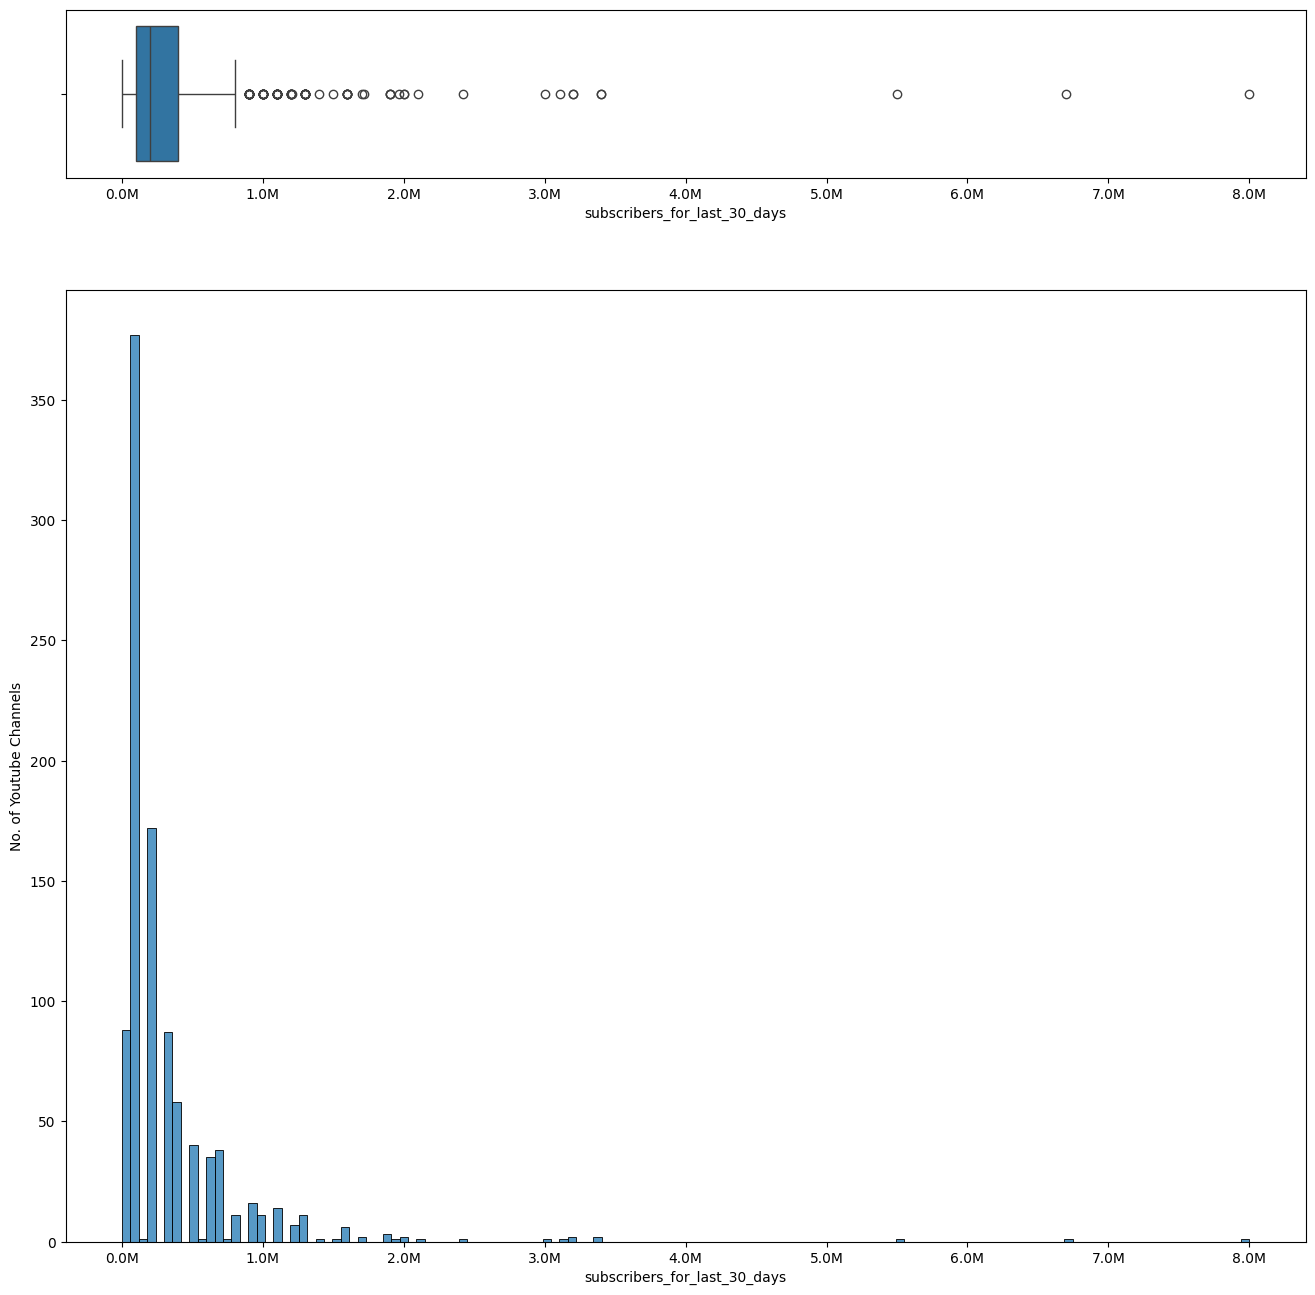

In [805]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)
selected_columns = continuous_df.columns
for column in selected_columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(16,16))
    sns.boxplot(data=continuous_df, x=column, ax=ax_box)
    ax_box.xaxis.set_major_formatter(formatter)
    sns.histplot(data=continuous_df, x=column, ax=ax_hist)
    ax_hist.xaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
    ax_hist.set_ylabel("No. of Youtube Channels")

    plt.show()
    

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\3521204652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discrete_df, y=discrete_df['created_year'], order= discrete_df['created_year'].value_counts(dropna=True).index, palette='muted')


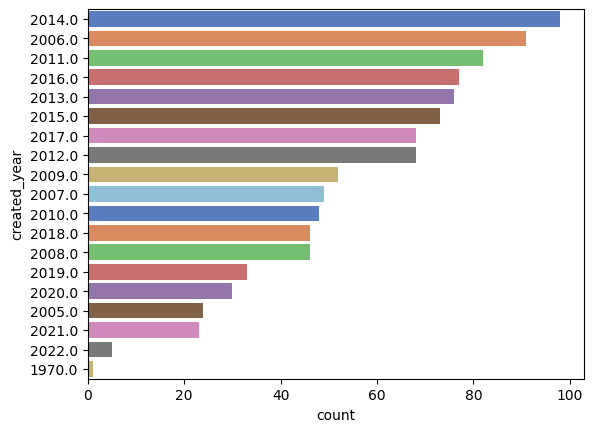

In [806]:
sns.countplot(data=discrete_df, y=discrete_df['created_year'], order= discrete_df['created_year'].value_counts(dropna=True).index, palette='muted')
plt.show()

In [906]:
m = discrete_df[discrete_df['created_year'].notna()]['created_year'].mode()[0]
m

2014.0

In [926]:
discrete_df['created_year'] = np.where(discrete_df['created_year'] == 1970, m, discrete_df['created_year'] )
discrete_df['created_year'] = data['created_year'].fillna(m)

In [928]:
discrete_df['created_year'].value_counts(dropna=False)

created_year
2014.0    104
2006.0     91
2011.0     82
2016.0     77
2013.0     76
2015.0     73
2017.0     68
2012.0     68
2009.0     52
2007.0     49
2010.0     48
2018.0     46
2008.0     46
2019.0     33
2020.0     30
2005.0     24
2021.0     23
2022.0      5
Name: count, dtype: int64

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\2676110848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=discrete_df, y=discrete_df['created_year'], palette='muted', ax=ax)


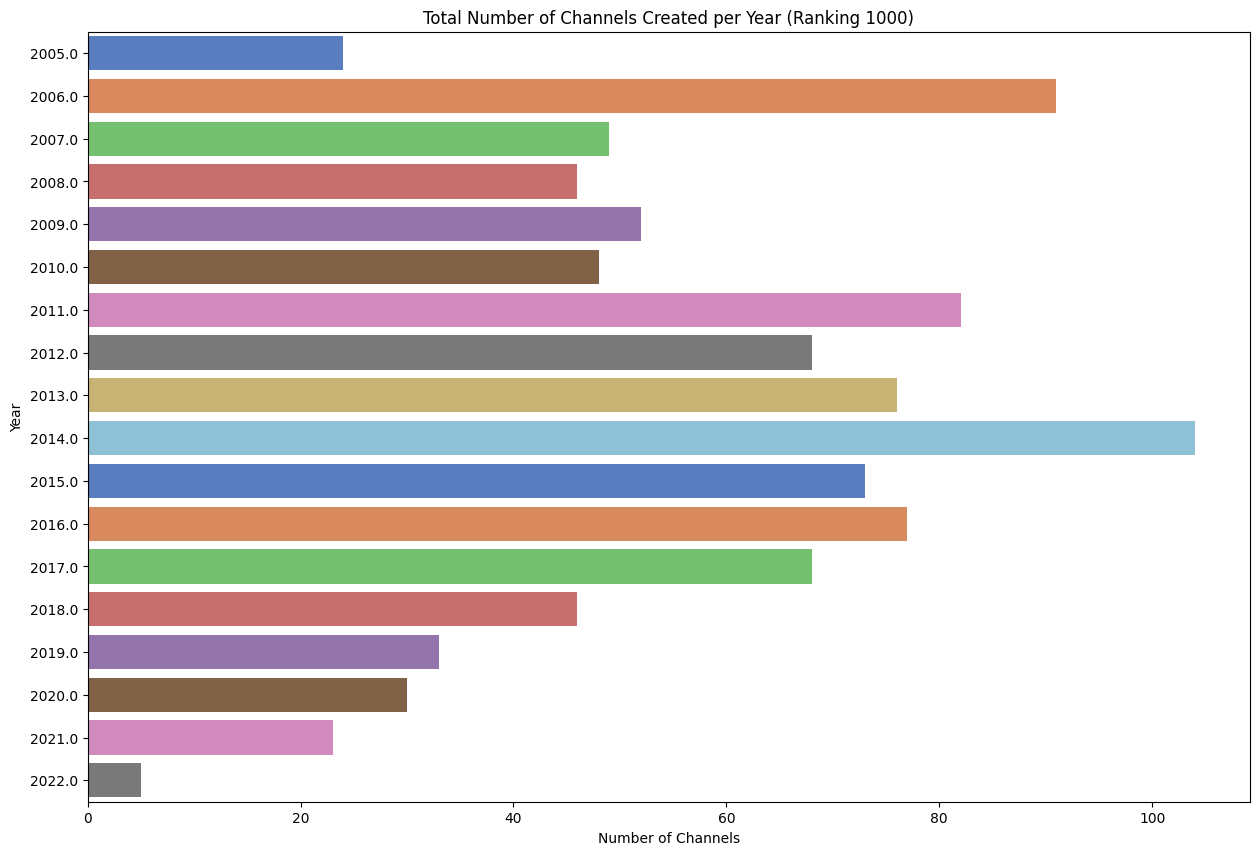

In [929]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=discrete_df, y=discrete_df['created_year'], palette='muted', ax=ax)
ax.set_xlabel("Number of Channels")
ax.set_ylabel("Year")
ax.set_title("Total Number of Channels Created per Year (Ranking 1000)")
plt.show()

I conclude that I can not train a linear model given the low correlation and the high skewness of the columns in this data set. I am exploring the categorical columns now. 

# EDA Categorical Data

In [930]:
categorical_df

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep
...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep
992,Panda,unknown,HybridPanda,United Kingdom,GB,Games,Sep
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May


In [931]:
categorical_df1 = categorical_df.drop(columns={'Youtuber', 'Title', 'Abbreviation', 'created_month'})
categorical_df1.head()

,category,Country,channel_type
0,Music,India,Music
1,Film & Animation,United States,Games
2,Entertainment,United States,Entertainment
3,Education,United States,Education
4,Shows,India,Entertainment


In [932]:
categorical_df1['Country'].fillna('Unknown', inplace=True)


In [933]:
categorical_df1['Country'].value_counts(dropna=False)

Country
United States           313
India                   168
Unknown                 122
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru        

In [934]:
categorical_df1['channel_type'].value_counts(dropna=False)

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
NaN               30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [935]:
categorical_df1['category'].value_counts(dropna=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
unknown                   46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [936]:
categorical_df1['category'] = np.where(categorical_df['category'].isna(), 'unknown', categorical_df['category'] )

In [937]:
categorical_df1['category'].value_counts(dropna=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
unknown                   46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

## Content Strategy: Which are the most popular categories and upload frequencies that resonate with audiences?

In [938]:
def plot_categorical(df: pd.DataFrame)-> plt:

    """"
    This function inputs a pandas DataFrame and creates a seaborn countplot of each categorical 
    column. It sorts the bars by frequency ie: the most frequent values are placed first. 
    with value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more,
    the corresponding countplot shows the bars placed on the y-axis instead of the x-axis.
    """
    for col in df.columns:
        if df[col].dtype == 'object':
            fig, ax = plt.subplots(figsize=(15,15))
            order = df[col].value_counts().index
            if df[col].nunique() >= 6:
                sns.countplot(data=df, y=col, order=order,  palette='Set3', ax=ax)
                ax.set_xlabel("Number of Channels")
                ax.set_ylabel("Category")
                
            else:
                sns.countplot(data=df, x=col, order=order,  palette='Set3', ax=ax)
                ax.set_xlabel("Number of Channels")
                ax.set_ylabel("Category")
                

            plt.title(f'Number of Channels per {col}')
            plt.show()

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\1703234830.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order,  palette='Set3', ax=ax)


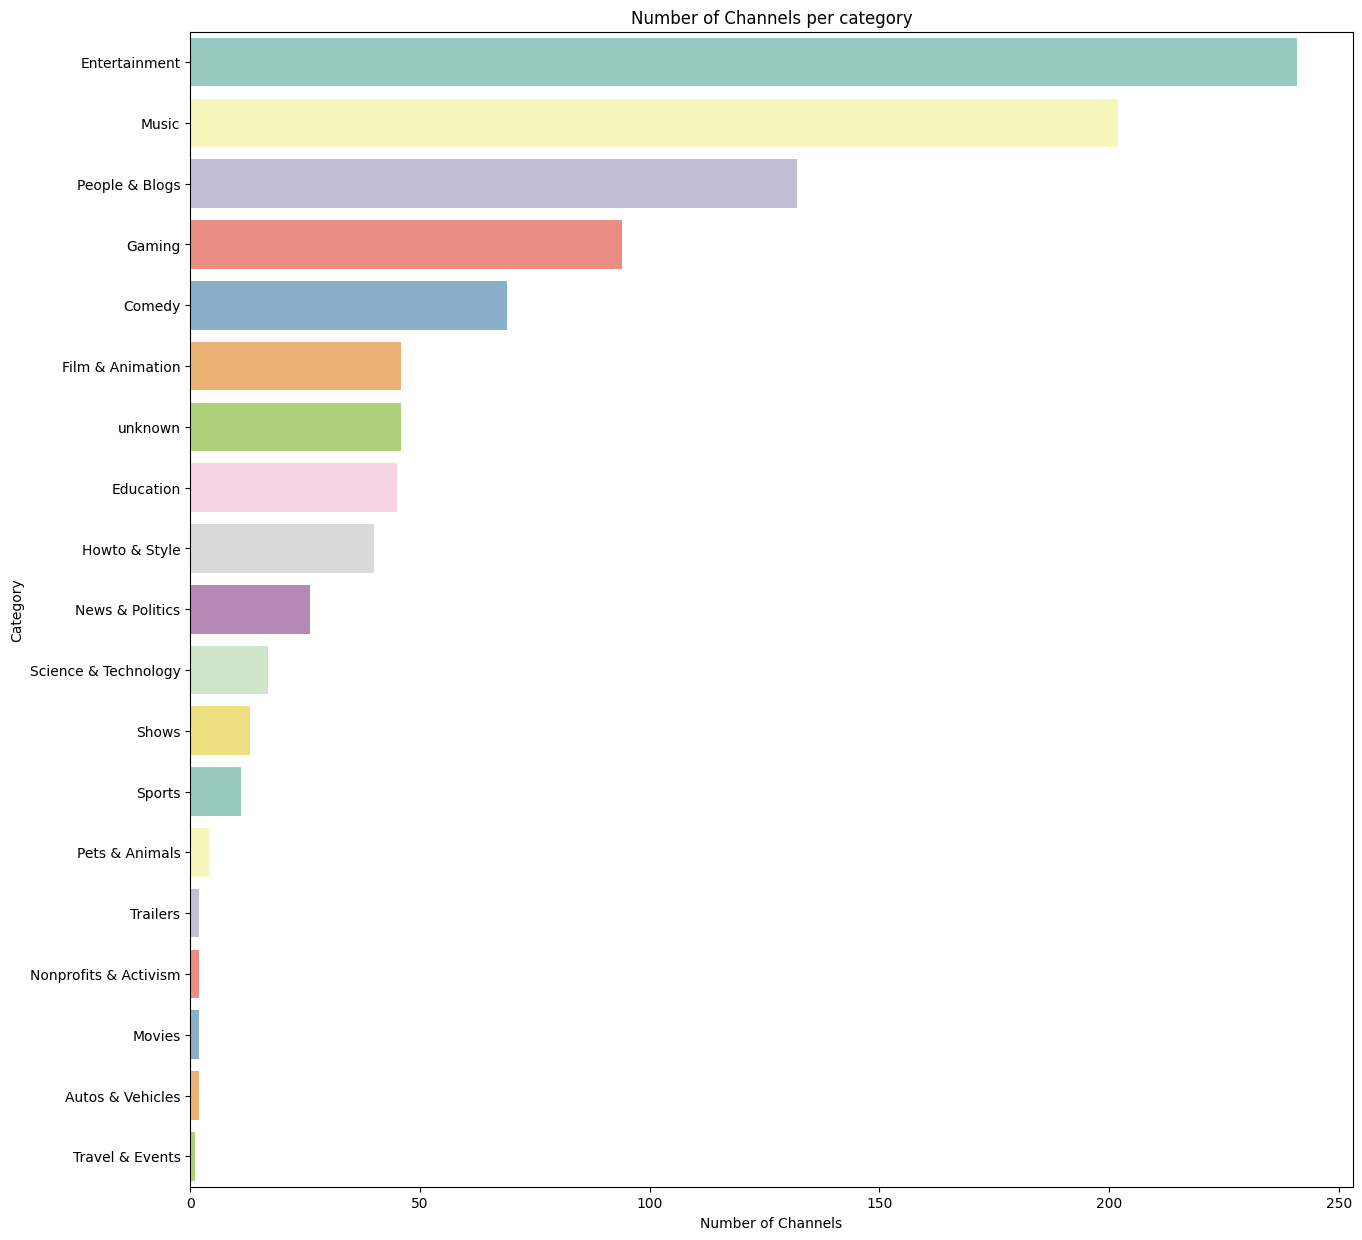

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\1703234830.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order,  palette='Set3', ax=ax)


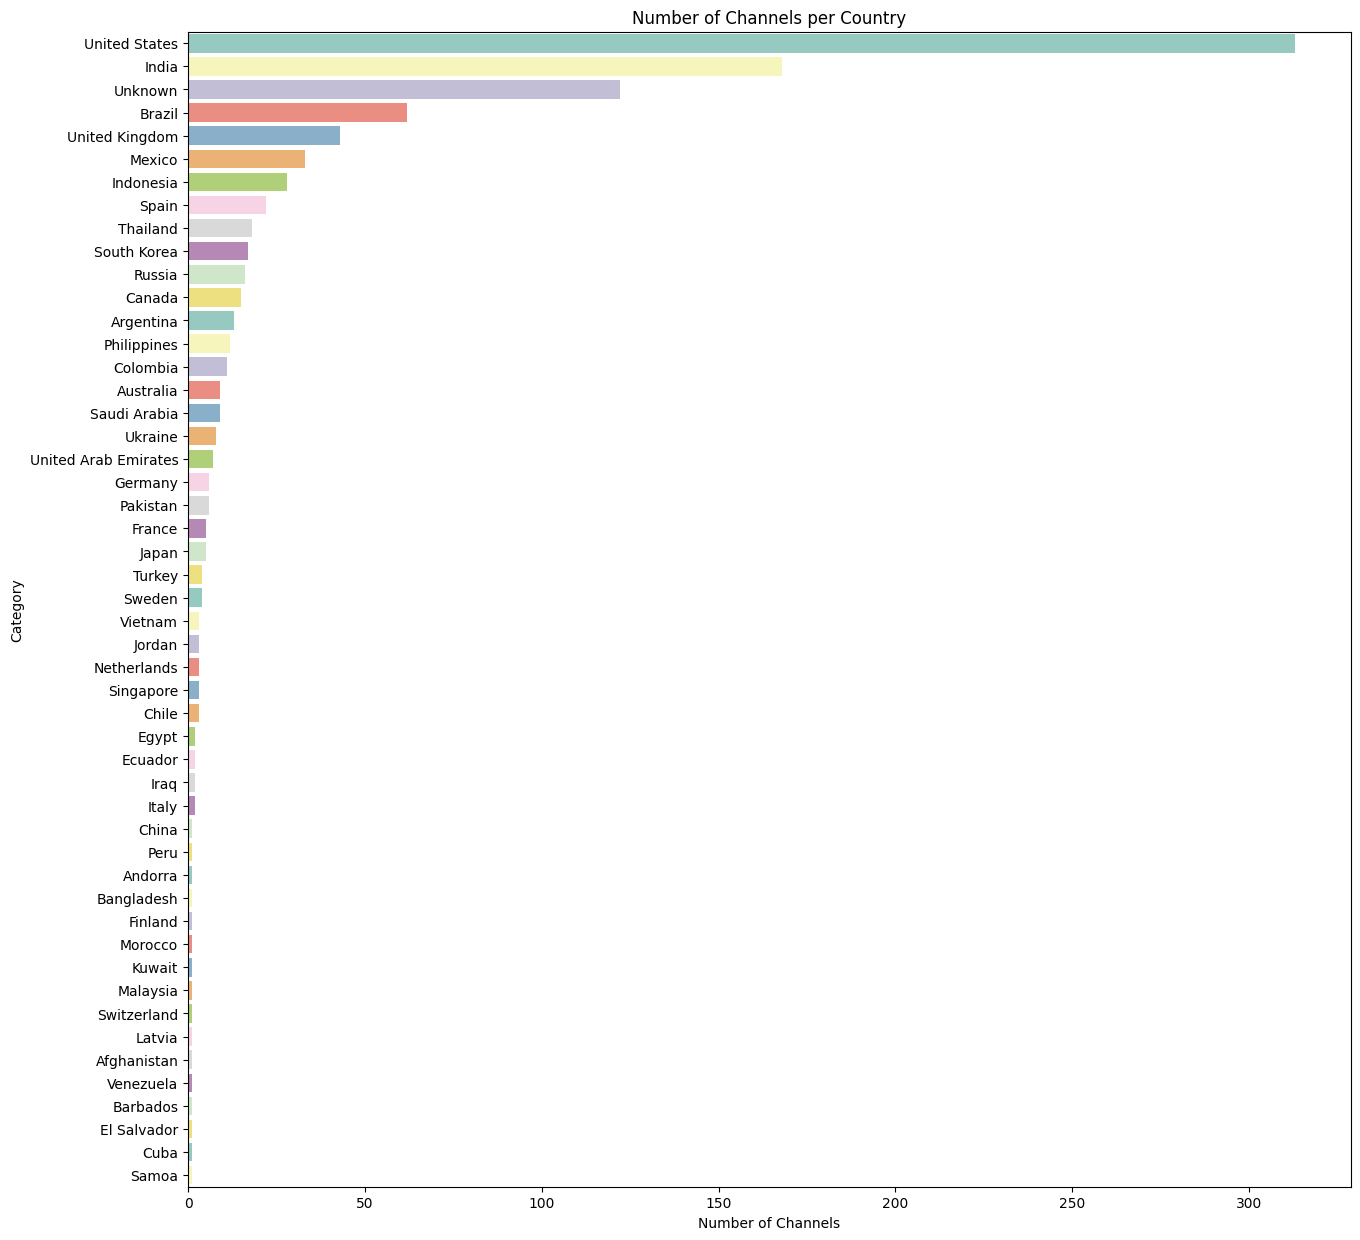

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\1703234830.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order,  palette='Set3', ax=ax)


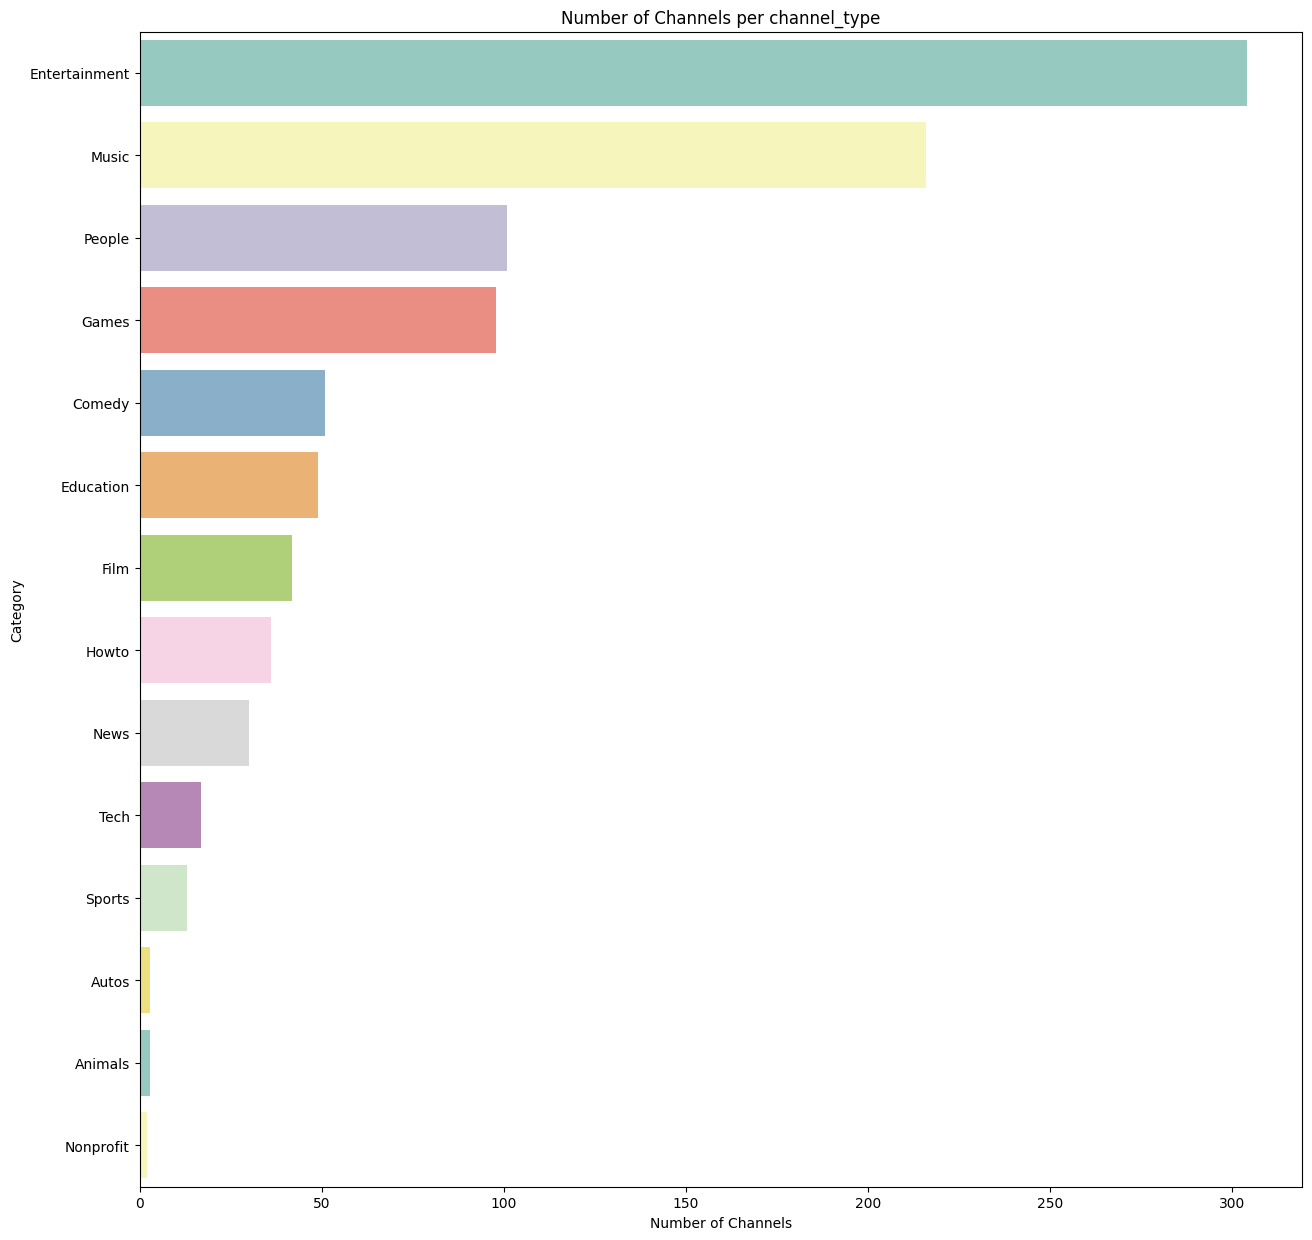

In [939]:
plot_categorical(categorical_df1)

# More EDA

In [940]:
categorical_df['Country'] = categorical_df1['Country']
categorical_df['category'] = categorical_df1['category']

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\3187223079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Country'] = categorical_df1['Country']
C:\Users\chech\AppData\Local\Temp\ipykernel_60640\3187223079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['category'] = categorical_df1['category']


In [941]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [942]:
concat_df = pd.concat([categorical_df, continuous_df, discrete_df], axis=1)
concat_df

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month,subscribers,video views,uploads,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date
0,T-Series,Music,T-Series,India,IN,Music,Mar,245000000,2.280000e+11,20082,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,13.0
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar,170000000,0.000000e+00,1,1.200000e+01,0.0,0.05,0.04,5.800000e-01,100000.0,2006.0,5.0
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb,166000000,2.836884e+10,741,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,20.0
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep,162000000,1.640000e+11,966,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,1.0
4,SET India,Shows,SET India,India,IN,Entertainment,Sep,159000000,1.480000e+11,116536,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,Sports,Natan por Aï¿,Brazil,BR,Entertainment,Feb,12300000,9.029610e+09,1200,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,12.0
991,Free Fire India Official,People & Blogs,Free Fire India Official,India,IN,Games,Sep,12300000,1.674410e+09,1500,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,14.0
992,Panda,unknown,HybridPanda,United Kingdom,GB,Games,Sep,12300000,2.214684e+09,2452,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,11.0
993,RobTopGames,Gaming,RobTopGames,Sweden,SE,Games,May,12300000,3.741235e+08,39,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,9.0


## Number of Channels Created per Content category

## Trending Topics: how certain categories gain popularity over time and correlate with world events?

In [944]:
def channels_created_category(df: pd.DataFrame, start_year: int = 2005,  end_year: int = 2022 )-> plt:

    """"
    This function inputs a pandas DataFrame and creates a seaborn lineplot of the category column. 
    It shows the evolution of the creation of new channels per content category over the desired period. Taking as default
    period 2005 - 2022. It can be input any value from 2005 as the start_year and 2022 as the end_year.
    """
    data_subset = concat_df[(concat_df['created_year'] >= start_year) & (concat_df['created_year'] <= end_year)]

    data_subset = data_subset.groupby(['created_year', 'category']).size().reset_index(name='counts')

    # plot
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.lineplot(data=data_subset, x='created_year', y='counts', hue='category', ci=None,  linewidth=4.0, ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel("No. of Channels")
    ax.set_title(f"Number of Channels Created per Content Category {start_year} -{end_year}")
    plt.show()


C:\Users\chech\AppData\Local\Temp\ipykernel_60640\171259112.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_subset, x='created_year', y='counts', hue='category', ci=None,  linewidth=4.0, ax=ax)


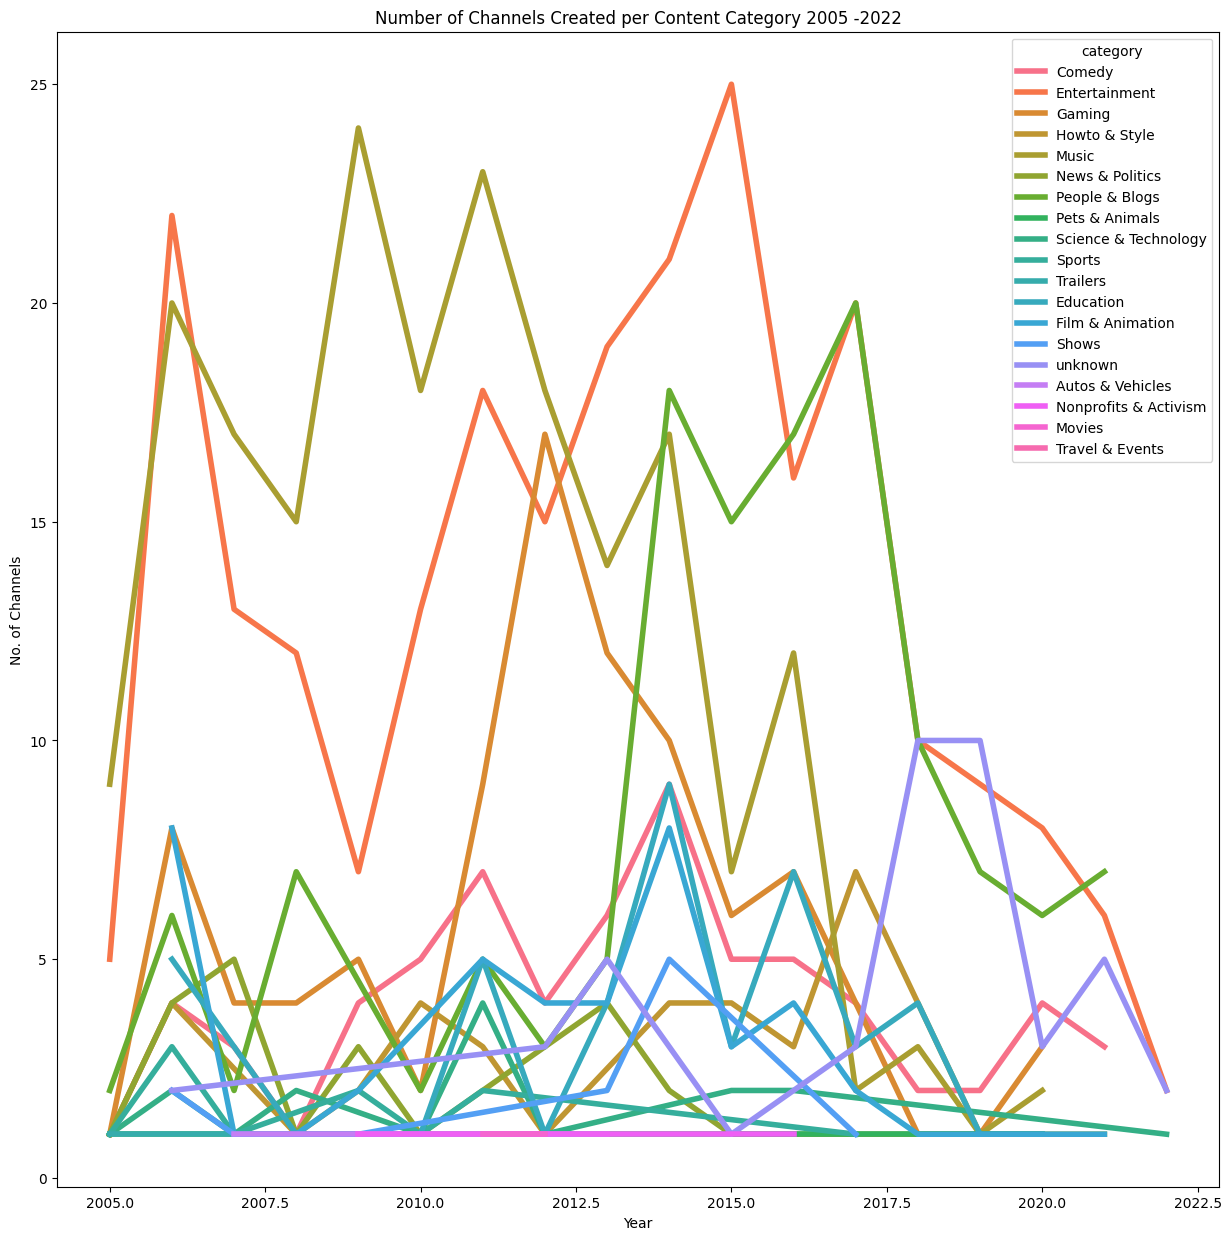

In [945]:
channels_created_category(concat_df)

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\171259112.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_subset, x='created_year', y='counts', hue='category', ci=None,  linewidth=4.0, ax=ax)


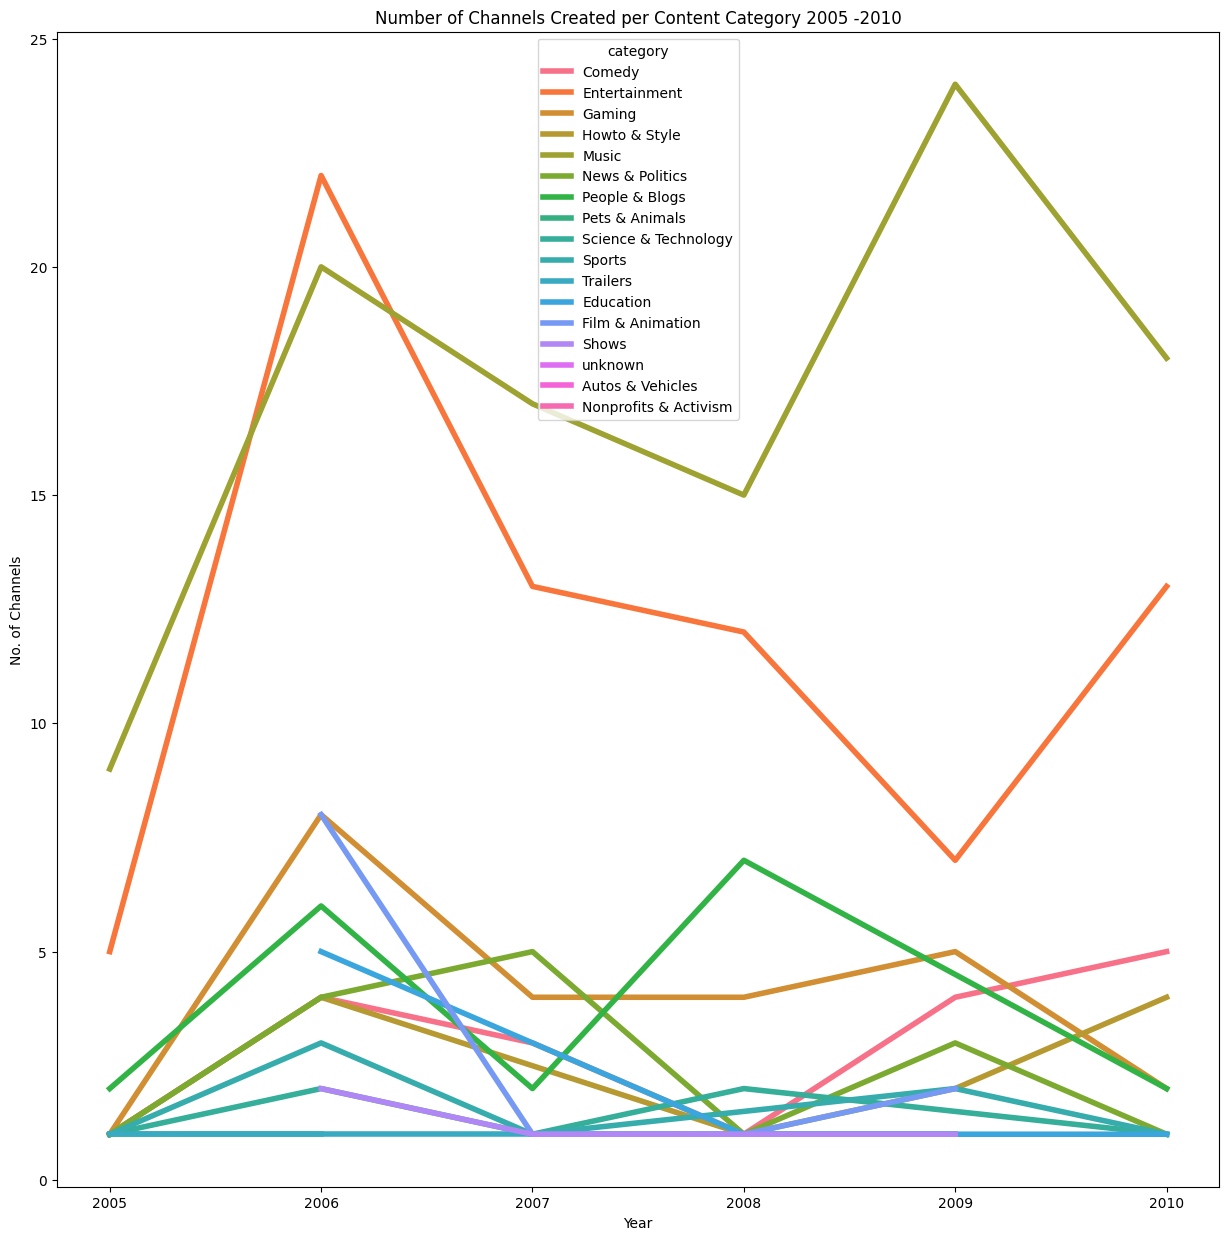

In [946]:
channels_created_category(concat_df, 2005, 2010)

Music and Entertainment were the type of channels created more frequently in the period 2005 - 2010.

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\171259112.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_subset, x='created_year', y='counts', hue='category', ci=None,  linewidth=4.0, ax=ax)


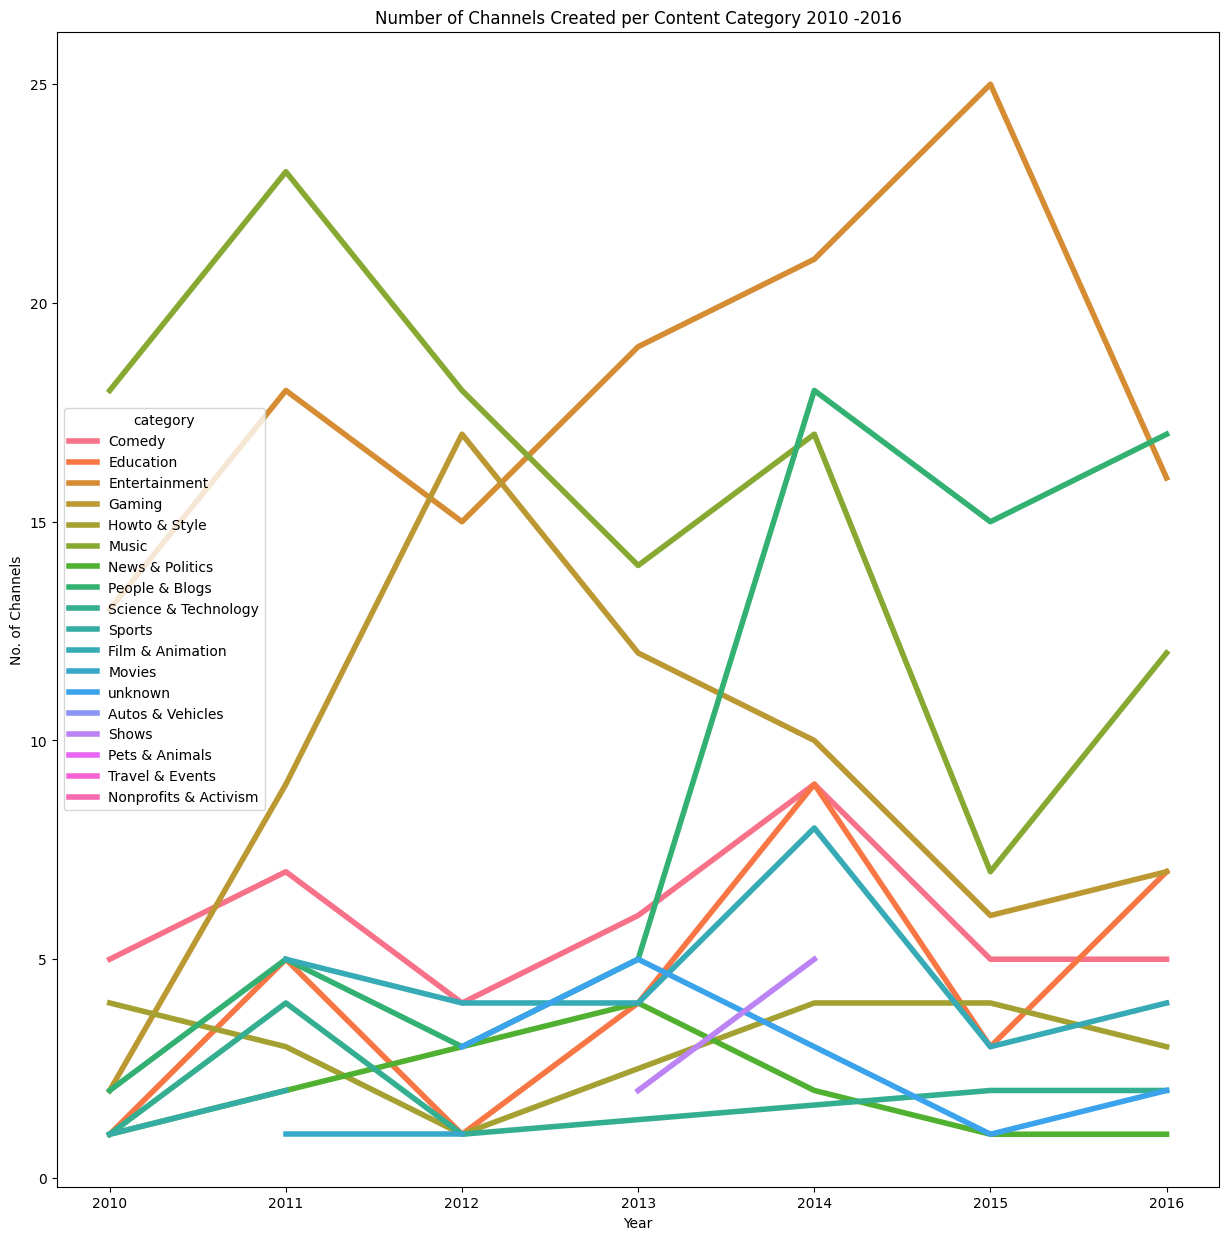

In [947]:
channels_created_category(concat_df, 2010, 2016)


The category Gaming had an abrupt drop since its best moment in 2012. Music presented a downwards trend. People and blogs started presenting an astonishing upwards trend as well as Entertaiment. 

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\171259112.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_subset, x='created_year', y='counts', hue='category', ci=None,  linewidth=4.0, ax=ax)


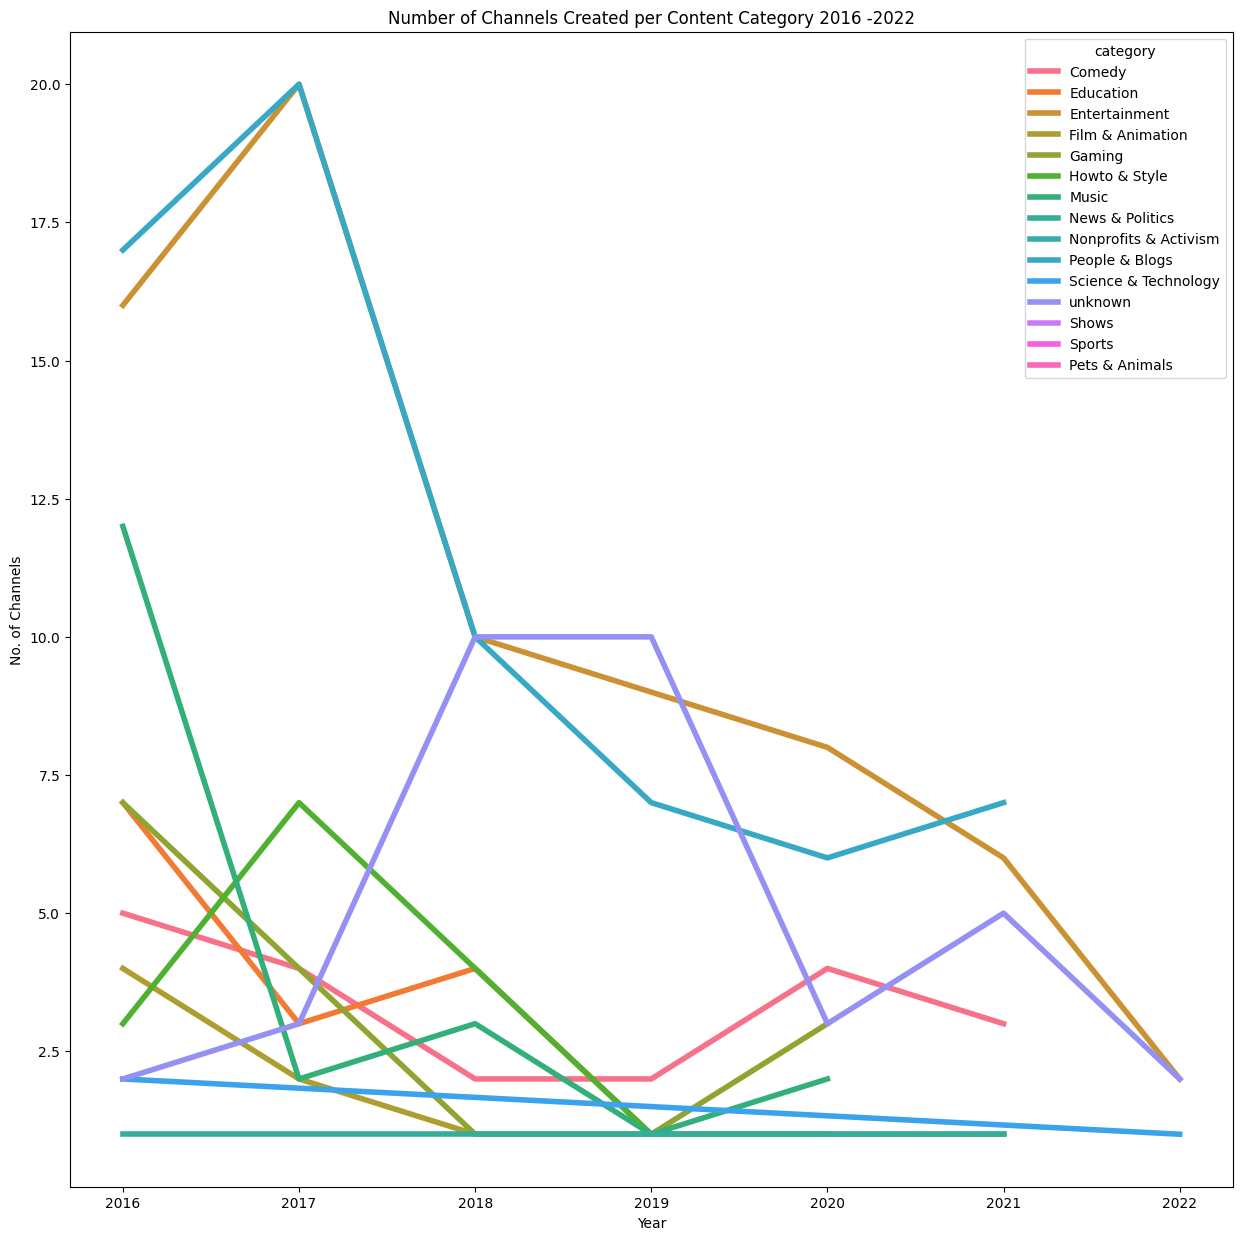

In [948]:
channels_created_category(concat_df, 2016, 2022)

People and Blogs together with Entertainment had an abrupt fall since their best moemnt 2017. It can be observed an inflection point in the year 2017. It can be observed that less and less channels that were created after that date are included now in the ranking. What can be translated as the best moment to get involved in content creation was before 2018. With the benefit of the hindsight, it can be stated that this would have increased the chances of present success significantly. 

How to and Style are the categories that are gaining more new subscribers since 2019. I can see a correlation with the lockdowns during the COVID-19 Pandemic.

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\697760131.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_subset, y='category', x='subscribers', palette='Paired', ax=ax)


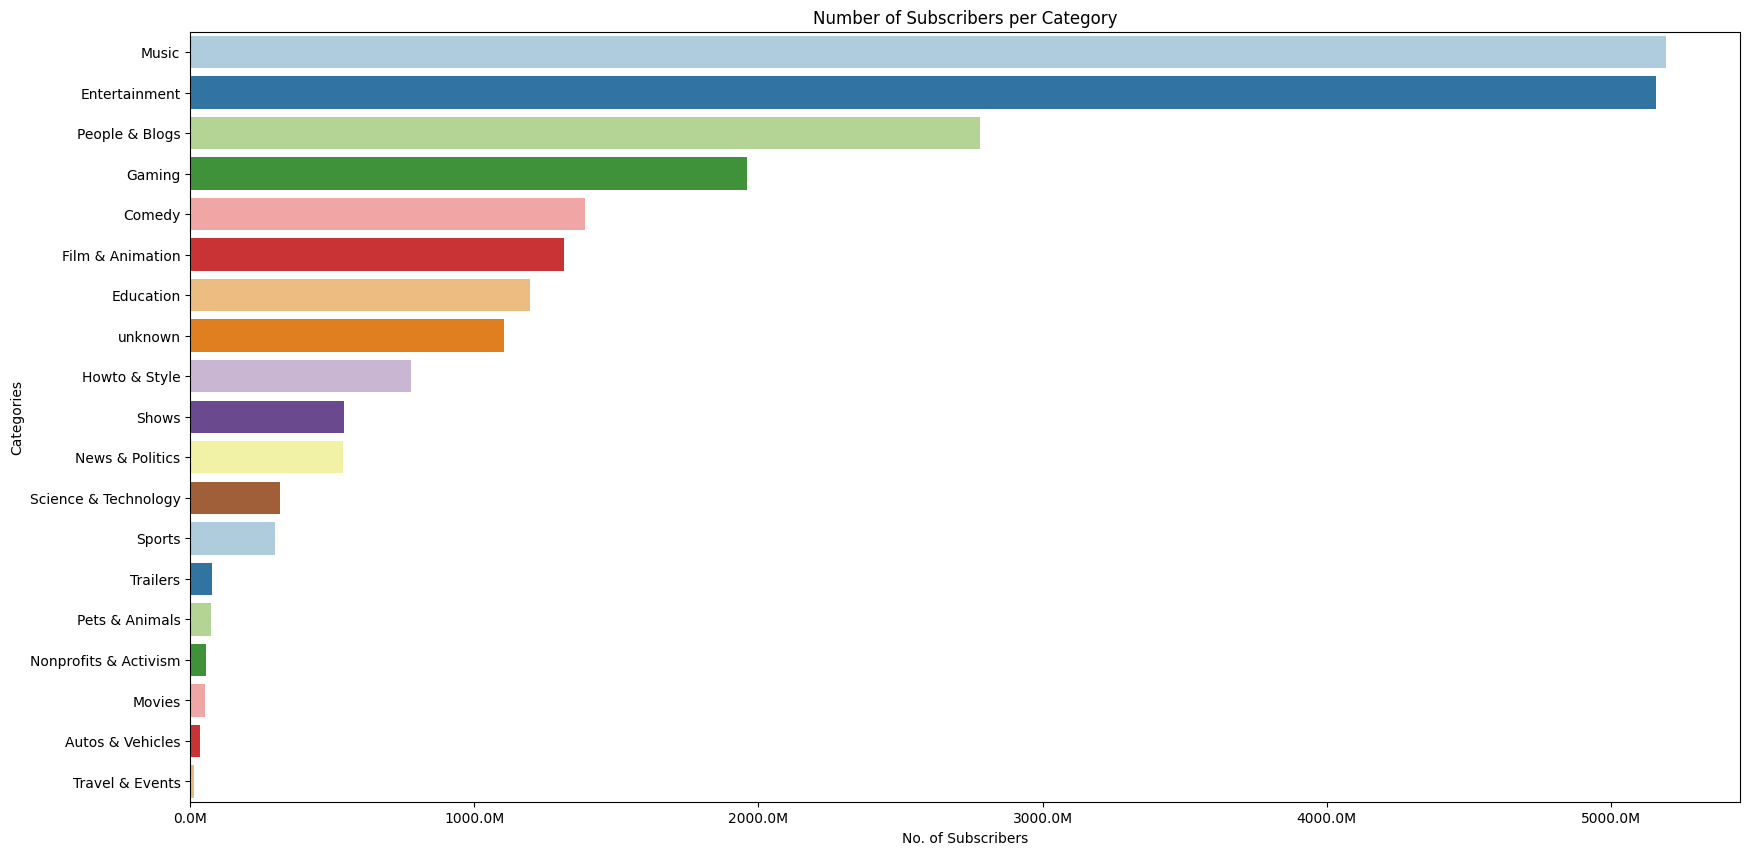

In [949]:
# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

data_subset = concat_df.groupby(['category']).agg({'subscribers': 'sum'}).reset_index()
data_subset = data_subset.sort_values(by = 'subscribers', ascending=False)

formatter = mtick.FuncFormatter(millions)

# Then, plot the barplot with the subsetted data
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_subset, y='category', x='subscribers', palette='Paired', ax=ax)
ax.set_xlabel("No. of Subscribers")
ax.set_ylabel("Categories")
ax.set_title("Number of Subscribers per Category")
ax.xaxis.set_major_formatter(formatter) 
plt.show()

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\2862819926.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_subset, y='category', x='video views', palette='Paired', ax=ax)


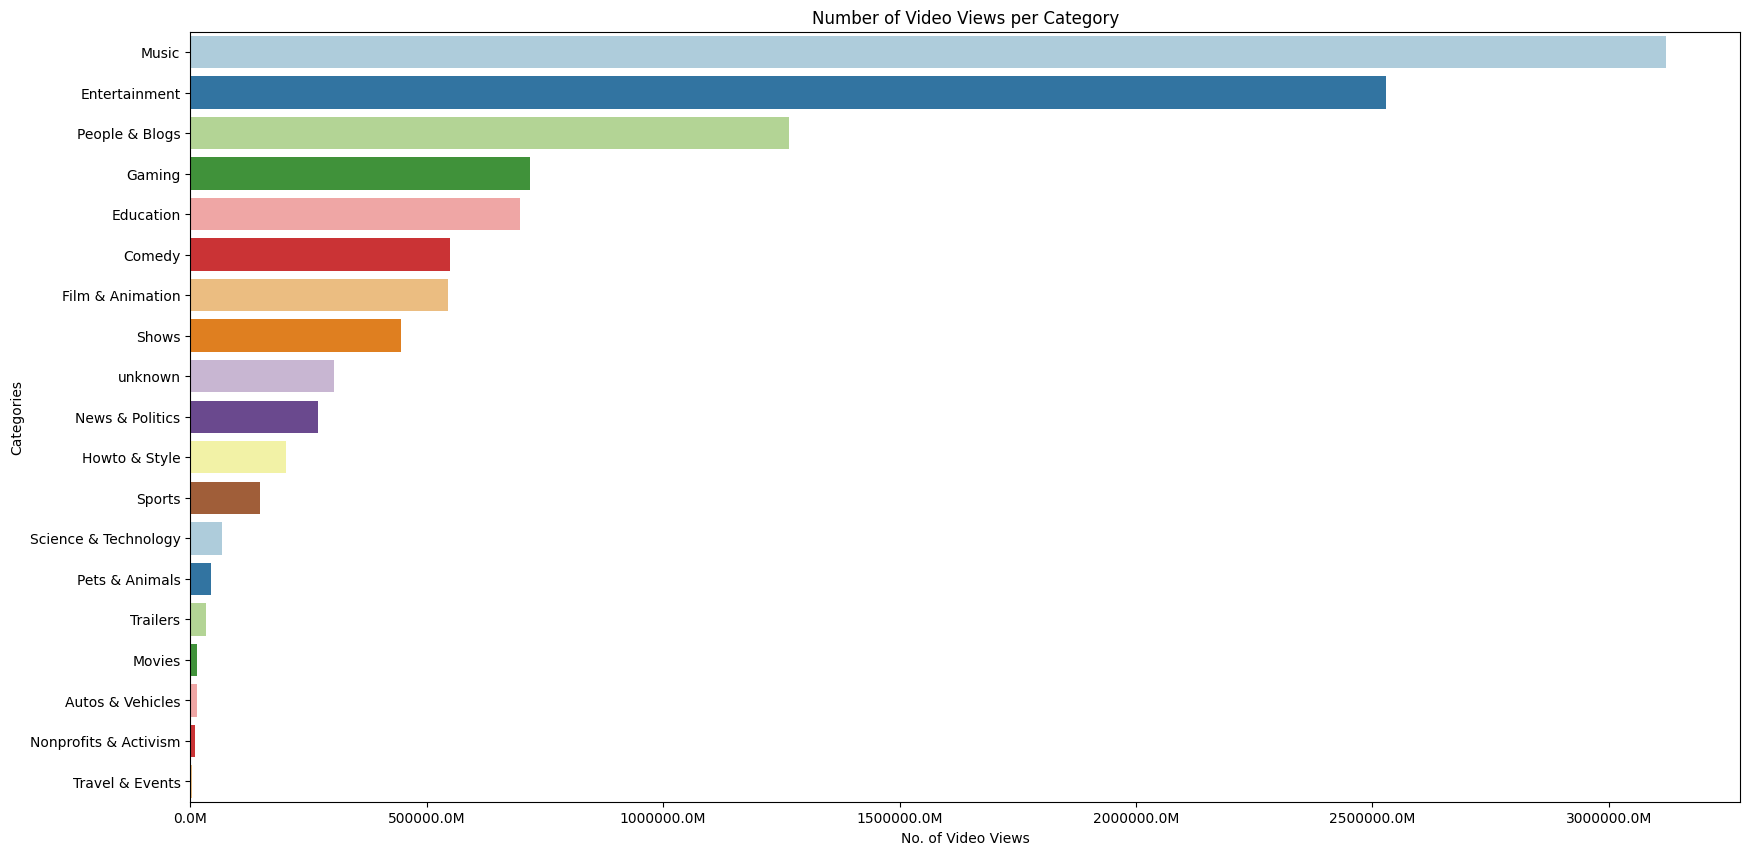

In [950]:
# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

data_subset = concat_df.groupby(['category']).agg({'video views': 'sum'}).reset_index()
data_subset = data_subset.sort_values(by = 'video views', ascending=False)

formatter = mtick.FuncFormatter(millions)

# Then, plot the barplot with the subsetted data
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_subset, y='category', x='video views', palette='Paired', ax=ax)
ax.set_xlabel("No. of Video Views")
ax.set_ylabel("Categories")
ax.set_title("Number of Video Views per Category")
ax.xaxis.set_major_formatter(formatter) 
plt.show()

C:\Users\chech\AppData\Local\Temp\ipykernel_60640\2926717165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_subset, y='category', x='uploads', palette='Paired', ax=ax)


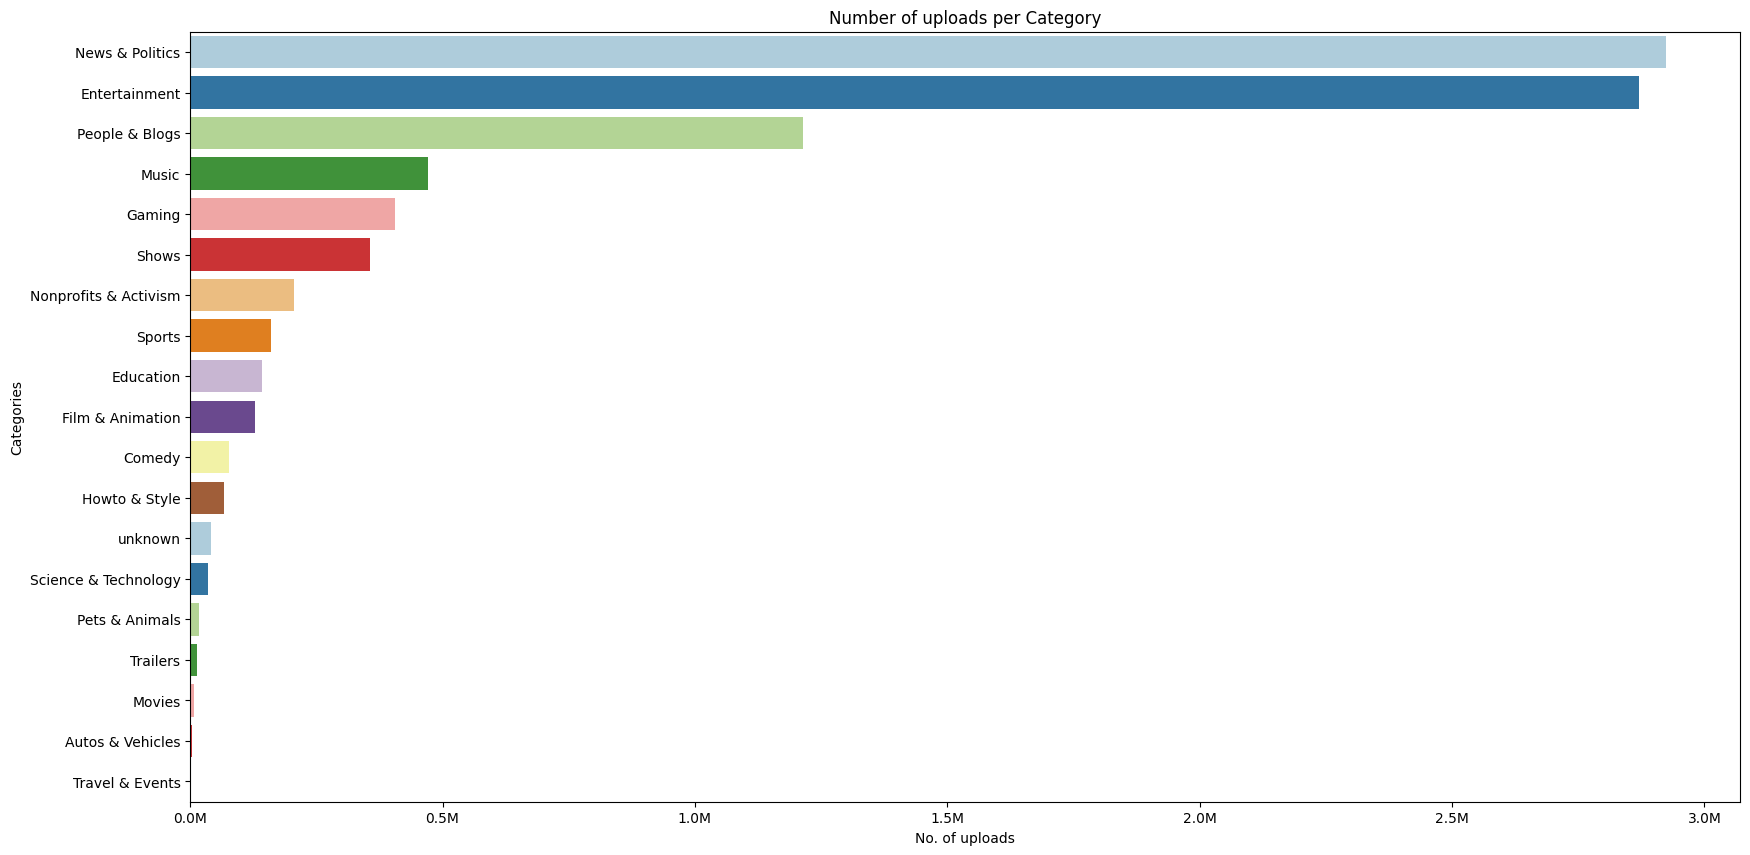

In [951]:
# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

data_subset = concat_df.groupby(['category']).agg({'uploads': 'sum'}).reset_index()
data_subset = data_subset.sort_values(by = 'uploads', ascending=False)

formatter = mtick.FuncFormatter(millions)

# Then, plot the barplot with the subsetted data
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_subset, y='category', x='uploads', palette='Paired', ax=ax)
ax.set_xlabel("No. of uploads")
ax.set_ylabel("Categories")
ax.set_title("Number of uploads per Category")
ax.xaxis.set_major_formatter(formatter) 
plt.show()

# Regional Influencers: Who are the influential YouTube creators from different countries and which is their impact on a global scale?

In [952]:
def top_youtubers_country(data: pd.DataFrame, country: str, top_no: int=10) -> pd.DataFrame:

    """"
    This function inputs a data frame, and filters it according to the desired country and desired number of elements in the ranking, 
    The function returns a data frame including a ranking with the youtubers with the biggest number of subscribers per selected country.
    """
    # Group the data by 'Country' and apply nlargest on 'subscribers'
    top_youtubers = data.groupby('Country').apply(lambda x: x.nlargest(top_no, 'subscribers'))

   # Reset the index
    top_youtubers.reset_index(drop=True, inplace=True)

    list_youtubers = top_youtubers.loc[top_youtubers['Country'] == country]

    return list_youtubers

In [953]:
top_youtubers_country(concat_df, 'United States', 10)

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month,subscribers,video views,uploads,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date
228,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar,170000000,0.000000e+00,1,1.200000e+01,0.0,0.05,0.04,0.58,100000.0,2006.0,5.0
229,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb,166000000,2.836884e+10,741,1.348000e+09,337000.0,5400000.00,4000000.00,64700000.00,8000000.0,2012.0,20.0
230,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep,162000000,1.640000e+11,966,1.975000e+09,493800.0,7900000.00,5900000.00,94800000.00,1000000.0,2006.0,1.0
231,ýýý Kids Diana Show,People & Blogs,ýýý Kids Diana Show,United States,US,Entertainment,May,112000000,9.324704e+10,1111,7.316740e+08,182900.0,2900000.00,2200000.00,35100000.00,100000.0,2015.0,12.0
232,Vlad and Niki,Entertainment,Vlad and Niki,United States,US,Entertainment,Apr,98900000,7.718017e+10,574,5.805740e+08,145100.0,2300000.00,1700000.00,27900000.00,600000.0,2018.0,23.0
233,WWE,Sports,WWE,United States,US,Sports,May,96000000,7.742847e+10,70127,7.146140e+08,178700.0,2900000.00,2100000.00,34300000.00,600000.0,2007.0,11.0
234,Sports,unknown,sports,United States,US,Entertainment,Jan,75000000,0.000000e+00,3,1.600000e+01,0.0,0.06,0.05,0.77,700000.0,2006.0,30.0
235,Pinkfong Baby Shark - Kids' Songs & Stories,Education,Pinkfong Baby Shark - Kids' Songs & Stories,United States,US,Education,Dec,68200000,3.884323e+10,2865,4.733870e+08,118300.0,1900000.00,1400000.00,22700000.00,600000.0,2011.0,14.0
236,Dude Perfect,Sports,Dude Perfect,United States,US,Sports,Mar,59500000,1.624155e+10,389,1.412000e+08,35300.0,564800.00,423600.00,6800000.00,100000.0,2009.0,17.0
237,Movieclips,Film & Animation,Movieclips,United States,US,Film,Apr,59500000,5.931647e+10,39113,1.146680e+08,28700.0,458700.00,344000.00,5500000.00,100000.0,2006.0,28.0


# Linear Model

Continues in the next notebook.

In [954]:
concat_df.drop(columns=['Title','Abbreviation', 'created_year', 'created_date', 'created_month', 'channel_type'], inplace=True)

In [955]:
concat_df.to_csv('../data/clean/Global_YouTube_Statistics1.csv', index=False)